In [1]:
import pandas as pd
import gc #garbage collector

pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 200)  # ao invés de none pode por INT do limite
#pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../data/OxCGRT_Brazil_latest.csv', low_memory=False)
df_mor = pd.read_csv('../data/mortes-por-semana-ponderado.csv')

#Quantidade de estados
aux = df['RegionName'].value_counts().to_frame()

print('Quantidade de Regions:' + str(len(aux)))
print(aux.index.to_list())

Quantidade de Regions:27
['Para', 'Paraiba', 'Sao Paulo', 'Sergipe', 'Santa Catarina', 'Rio Grande do Sul', 'Roraima', 'Rondonia', 'Rio Grande do Norte', 'Rio de Janeiro', 'Parana', 'Piaui', 'Pernambuco', 'Acre', 'Alagoas', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Maranhao', 'Goias', 'Espirito Santo', 'Ceara', 'Bahia', 'Amapa', 'Amazonas', 'Tocantins', 'Distrito Federal']


# Agrupar cidades no ano de 2021 e moda das medidas

In [2]:
df.dropna(axis=0, how='any', subset=['CityCode'], inplace=True)

In [3]:
#set index pro q quer organizar
df = df.set_index('CityName', 'Date')
df['NewDeaths'] = df['ConfirmedDeaths'] - df['ConfirmedDeaths'].shift(1)
df = df.reset_index()

C:\Users\edupo\AppData\Local\Temp\ipykernel_13692\3540096581.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  df = df.set_index('CityName', 'Date')


In [4]:
#alguns dias tão com menos mortes que os anteriores, seta pra 0 esses erros
df.loc[df['NewDeaths'] < 0,'NewDeaths'] = 0

In [5]:
#Converte coluna Date de INT para DATETIME
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

#organizar por data/cidade p depois dar slice
df = df.sort_values(by=['Date', 'CityName'])

In [6]:
#CITY_TOTAL: Descreve o ambiente de resposta geral que se aplica aos residentes do município, incluindo políticas definidas pelo governo nacional e pelo governo estadual,
#onde tais valores forem mais rigorosos do que a ação no nível municipal.
df = df.loc[df['Jurisdiction'] == 'CITY_TOTAL']

In [7]:
#dropa coluna jurisdiction pq n vai usar mais
df = df.drop(columns=['Jurisdiction'])

In [8]:
#dropa as notas dos indicadores que não serão úteis nessa analise
df = df.drop(columns=['C1_Notes', 'C2_Notes', 'C3_Notes', 'C4_Notes','C5_Notes','C6_Notes','C7_Notes','C8_Notes','E1_Notes','E2_Notes','E3_Notes','E4_Notes', \
    'H1_Notes','H2_Notes','H3_Notes','H4_Notes','H5_Notes','H6_Notes','H7_Notes','H8_Notes','M1_Wildcard','M1_Notes','V1_Notes','V2_Notes','V3_Notes','V4_Notes'])

In [9]:
#Como os NaN nos indicadores são dados interessantes, da replace neles por -1 para identificá-los
indicadores = ['C1_School closing', 'C1_Flag','C2_Workplace closing', 'C2_Flag','C3_Cancel public events', 'C3_Flag', \
    'C4_Restrictions on gatherings', 'C4_Flag','C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',  \
    'C7_Restrictions on internal movement', 'C7_Flag', 'C8_International travel controls',  'E1_Income support', \
    'E1_Flag', 'E2_Debt/contract relief', 'E3_Fiscal measures',  'E4_International support', \
    'H1_Public information campaigns', 'H1_Flag', 'H2_Testing policy',  'H3_Contact tracing',  \
    'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',  'H6_Facial Coverings', \
    'H6_Flag',  'H7_Vaccination policy', 'H7_Flag', 'H8_Protection of elderly people', 'H8_Flag',   \
    'V1_Vaccine Prioritisation', 'V2_Vaccine Availability',  'V3_Vaccine Financial Support', 'V4_Mandatory Vaccination', \
    'StringencyIndex', 'StringencyIndexForDisplay', 'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex', \
    'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex', 'EconomicSupportIndexForDisplay']

df[indicadores] = df[indicadores].fillna(-1)

In [10]:
#Separa o dataset em anos
anos = [part for _, part in df.groupby(pd.Grouper(key='Date',freq='Y'))]

anos[1].loc[anos[1]['CityName'] == 'Ananindeua']

CityName CountryName CountryCode RegionName RegionCode    CityCode  \
62762  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
62763  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
62764  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
62765  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
62766  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
...           ...         ...         ...        ...        ...         ...   
63122  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
63123  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
63124  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
63125  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
63126  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   

            Date  C1_School closing  C1_Flag  C2_Workplace closing  C2_Flag  \
62762 2021-01-01                2.0      1.0                   2.0      1.0   
62763 2021-01-02                2.0      1.0                   2.0      1.0   
62764 2021-01-03                2.0      1.0                   2.0      1.0   
62765 2021-01-04                2.0      1.0                   2.0      1.0   
62766 2021-01-05                2.0      1.0                   2.0      1.0   
...          ...                ...      ...                   ...      ...   
63122 2021-12-27                1.0      1.0                   2.0      1.0   
63123 2021-12-28                1.0      1.0                   2.0      1.0   
63124 2021-12-29                1.0      1.0                   2.0      1.0   
63125 2021-12-30                1.0      1.0                   2.0      1.0   
63126 2021-12-31                1.0      1.0                   2.0      1.0   

       C3_Cancel public events  C3_Flag  C4_Restrictions on gatherings  \
62762                      2.0      1.0                            2.0   
62763                      2.0      1.0                            2.0   
62764                      2.0      1.0                            2.0   
62765                      2.0      1.0                            2.0   
62766                      2.0      1.0                            2.0   
...                        ...      ...                            ...   
63122                      2.0      1.0                            2.0   
63123                      2.0      1.0                            2.0   
63124                      2.0      1.0                            2.0   
63125                      2.0      1.0                            2.0   
63126                      2.0      1.0                            2.0   

       C4_Flag  C5_Close public transport  C5_Flag  \
62762      1.0                        1.0      1.0   
62763      1.0                        1.0      1.0   
62764      1.0                        1.0      1.0   
62765      1.0                        1.0      1.0   
62766      1.0                        1.0      1.0   
...        ...                        ...      ...   
63122      1.0                        0.0     -1.0   
63123      1.0                        0.0     -1.0   
63124      1.0                        0.0     -1.0   
63125      1.0                        0.0     -1.0   
63126      1.0                        0.0     -1.0   

       C6_Stay at home requirements  C6_Flag  \
62762                           1.0      1.0   
62763                           1.0      1.0   
62764                           1.0      1.0   
62765                           1.0      1.0   
62766                           1.0      1.0   
...                             ...      ...   
63122                           1.0      1.0   
63123                           1.0      1.0   
63124                           1.0      1.0   
63125                           1.0      1.0   
63126                           1.0      1.0 

In [11]:
df_pol_ano = []

for ano in anos:
    #Pega o valor mais comum (moda) de cada indicador para cada cidade em uma dada semana
    dados = ano.groupby(['CityName'])[indicadores].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

    #Pega o último dia de cada semana dos períodos
    dados['Date'] = ano['Date'].dt.to_period('Y').reset_index()['Date']
    #dados['Date'] = str(ano['Date'].dt.to_period('W').reset_index()['Date']).split('/')[-1].split('\n')[0]
    #dados['Date'] = pd.to_datetime(dados['Date'])

    df_pol_ano.append(dados)

df_pol_ano = pd.concat(df_pol_ano)

#Reordena colunas
df_pol_ano = df_pol_ano[['CityName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing','C2_Flag', 'C3_Cancel public events', 'C3_Flag',\
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport','C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',\
       'C7_Restrictions on internal movement', 'C7_Flag','C8_International travel controls', 'E1_Income support', 'E1_Flag',\
       'E2_Debt/contract relief', 'E3_Fiscal measures','E4_International support', 'H1_Public information campaigns',\
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing','H4_Emergency investment in healthcare', 'H5_Investment in vaccines',\
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag','H8_Protection of elderly people', 'H8_Flag',\
       'V1_Vaccine Prioritisation', 'V2_Vaccine Availability','V3_Vaccine Financial Support', 'V4_Mandatory Vaccination',\
       'StringencyIndex', 'StringencyIndexForDisplay','GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay',\
       'ContainmentHealthIndex', 'ContainmentHealthIndexForDisplay','EconomicSupportIndex', 'EconomicSupportIndexForDisplay']]

df_pol_ano

CityName  Date  C1_School closing  C1_Flag  \
0                Ananindeua  2020                2.0      1.0   
1      Aparecida de Goiania  2020                3.0      1.0   
2                   Aracaju  2020                3.0      1.0   
3                 Araguaina  2020                3.0      1.0   
4                 Arapiraca  2020                3.0      1.0   
5                     Belem  2020                3.0      1.0   
6            Belo Horizonte  2020                3.0      1.0   
7                 Boa Vista  2020                3.0      1.0   
8                  Brasilia  2020               -1.0     -1.0   
9            Campina Grande  2020                3.0      1.0   
10             Campo Grande  2020                3.0      1.0   
11                  Caucaia  2020                3.0      1.0   
12            Caxias do Sul  2020                3.0      1.0   
13          Cruzeiro do Sul  2020                3.0      1.0   
14                   Cuiaba  2020                3.0      1.0   
15                 Curitiba  2020                3.0      1.0   
16                 Dourados  2020                3.0      1.0   
17         Feira de Santana  2020                3.0      1.0   
18            Florianopolis  2020                3.0      1.0   
19                Fortaleza  2020                3.0      1.0   
20                  Goiania  2020                3.0      1.0   
21                Guarulhos  2020                3.0      1.0   
22               Imperatriz  2020                2.0      1.0   
23  Jaboatao dos Guararapes  2020                3.0      1.0   
24                Ji-Parana  2020                3.0      1.0   
25              Joao Pessoa  2020                3.0      1.0   
26                Joinville  2020                3.0      1.0   
27                  Lagarto  2020                3.0      1.0   
28         Laranjal do Jari  2020                3.0      1.0   
29                 Londrina  2020                3.0      1.0   
30                   Macapa  2020                3.0      1.0   
31                   Maceio  2020                3.0      1.0   
32                   Manaus  2020                3.0      1.0   
33                  Mossoro  2020                3.0      1.0   
34                    Natal  2020                3.0      1.0   
35                   Palmas  2020                3.0      1.0   
36                Parintins  2020                3.0      1.0   
37                 Parnaiba  2020                3.0      1.0   
38             Porto Alegre  2020                3.0      1.0   
39              Porto Velho  2020                3.0      1.0   
40                   Recife  2020                3.0      1.0   
41               Rio Branco  2020                3.0      1.0   
42           Rio de Janeiro  2020                3.0      1.0   
43             Rondonopolis  2020                3.0      1.0   
44             Rorainopolis  2020                3.0      1.0   
45                 Salvador  2020                3.0      1.0   
46                 Santarem  2020                2.0      1.0   
47              Sao Goncalo  2020                3.0      1.0   
48                 Sao Luis  2020                2.0      1.0   
49                Sao Paulo  2020                3.0      1.0   
50                 Teresina  2020                3.0      1.0   
51               Uberlandia  2020                3.0      1.0   
52               Vila Velha  2020                3.0      1.0   
53                  Vitoria  2020                3.0      1.0   
0                Ananindeua  2021                1.0      1.0   
1      Aparecida de Goiania  2021                2.0      1.0   
2                   Aracaju  2021                2.0      1.0   
3                 Araguaina  2021                1.0      1.0   
4                 Arapiraca  2021                2.0      1.0   
5                     Belem  2021                1.0      1.0   
6            Belo Horizonte  2021                2.0  

In [12]:
df_pol_ano.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 53
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype        
---  ------                                 --------------  -----        
 0   CityName                               162 non-null    object       
 1   Date                                   162 non-null    period[A-DEC]
 2   C1_School closing                      162 non-null    float64      
 3   C1_Flag                                162 non-null    float64      
 4   C2_Workplace closing                   162 non-null    float64      
 5   C2_Flag                                162 non-null    float64      
 6   C3_Cancel public events                162 non-null    float64      
 7   C3_Flag                                162 non-null    float64      
 8   C4_Restrictions on gatherings          162 non-null    float64      
 9   C4_Flag                                162 non-null    float64      
 10  C5_

In [13]:
df_pol_ano.loc[df_pol_ano['Date'] == '2020']

CityName  Date  C1_School closing  C1_Flag  \
0                Ananindeua  2020                2.0      1.0   
1      Aparecida de Goiania  2020                3.0      1.0   
2                   Aracaju  2020                3.0      1.0   
3                 Araguaina  2020                3.0      1.0   
4                 Arapiraca  2020                3.0      1.0   
5                     Belem  2020                3.0      1.0   
6            Belo Horizonte  2020                3.0      1.0   
7                 Boa Vista  2020                3.0      1.0   
8                  Brasilia  2020               -1.0     -1.0   
9            Campina Grande  2020                3.0      1.0   
10             Campo Grande  2020                3.0      1.0   
11                  Caucaia  2020                3.0      1.0   
12            Caxias do Sul  2020                3.0      1.0   
13          Cruzeiro do Sul  2020                3.0      1.0   
14                   Cuiaba  2020                3.0      1.0   
15                 Curitiba  2020                3.0      1.0   
16                 Dourados  2020                3.0      1.0   
17         Feira de Santana  2020                3.0      1.0   
18            Florianopolis  2020                3.0      1.0   
19                Fortaleza  2020                3.0      1.0   
20                  Goiania  2020                3.0      1.0   
21                Guarulhos  2020                3.0      1.0   
22               Imperatriz  2020                2.0      1.0   
23  Jaboatao dos Guararapes  2020                3.0      1.0   
24                Ji-Parana  2020                3.0      1.0   
25              Joao Pessoa  2020                3.0      1.0   
26                Joinville  2020                3.0      1.0   
27                  Lagarto  2020                3.0      1.0   
28         Laranjal do Jari  2020                3.0      1.0   
29                 Londrina  2020                3.0      1.0   
30                   Macapa  2020                3.0      1.0   
31                   Maceio  2020                3.0      1.0   
32                   Manaus  2020                3.0      1.0   
33                  Mossoro  2020                3.0      1.0   
34                    Natal  2020                3.0      1.0   
35                   Palmas  2020                3.0      1.0   
36                Parintins  2020                3.0      1.0   
37                 Parnaiba  2020                3.0      1.0   
38             Porto Alegre  2020                3.0      1.0   
39              Porto Velho  2020                3.0      1.0   
40                   Recife  2020                3.0      1.0   
41               Rio Branco  2020                3.0      1.0   
42           Rio de Janeiro  2020                3.0      1.0   
43             Rondonopolis  2020                3.0      1.0   
44             Rorainopolis  2020                3.0      1.0   
45                 Salvador  2020                3.0      1.0   
46                 Santarem  2020                2.0      1.0   
47              Sao Goncalo  2020                3.0      1.0   
48                 Sao Luis  2020                2.0      1.0   
49                Sao Paulo  2020                3.0      1.0   
50                 Teresina  2020                3.0      1.0   
51               Uberlandia  2020                3.0      1.0   
52               Vila Velha  2020                3.0      1.0   
53                  Vitoria  2020                3.0      1.0   

    C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                    2.0      1.0                      2.0      1.0   
1                    2.0      1.0                      2.0      1.0   
2                    2.0      1.0                      2.0      1.0   
3                    2.0      1.0                      2.0      1.0   
4                    2.0      1.0                      2.0      1.0   
5                

# agrupar cidades por semana e moda das medidas

In [14]:
df.dropna(axis=0, how='any', subset=['CityCode'], inplace=True)

In [15]:
#set index pro q quer organizar
df = df.set_index('CityName', 'Date')
df['NewDeaths'] = df['ConfirmedDeaths'] - df['ConfirmedDeaths'].shift(1)
df = df.reset_index()

C:\Users\edupo\AppData\Local\Temp\ipykernel_13692\3540096581.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  df = df.set_index('CityName', 'Date')


In [16]:
#alguns dias tão com menos mortes que os anteriores, seta pra 0 esses erros
df.loc[df['NewDeaths'] < 0,'NewDeaths'] = 0

In [17]:
#Converte coluna Date de INT para DATETIME
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

#organizar por data/cidade p depois dar slice
df = df.sort_values(by=['Date', 'CityName'])

In [ ]:
#CITY_TOTAL: Descreve o ambiente de resposta geral que se aplica aos residentes do município, incluindo políticas definidas pelo governo nacional e pelo governo estadual,
#onde tais valores forem mais rigorosos do que a ação no nível municipal.
df = df.loc[df['Jurisdiction'] == 'CITY_TOTAL']

In [ ]:
#dropa coluna jurisdiction pq n vai usar mais
df = df.drop(columns=['Jurisdiction'])

In [ ]:
#dropa as notas dos indicadores que não serão úteis nessa analise
df = df.drop(columns=['C1_Notes', 'C2_Notes', 'C3_Notes', 'C4_Notes','C5_Notes','C6_Notes','C7_Notes','C8_Notes','E1_Notes','E2_Notes','E3_Notes','E4_Notes', \
    'H1_Notes','H2_Notes','H3_Notes','H4_Notes','H5_Notes','H6_Notes','H7_Notes','H8_Notes','M1_Wildcard','M1_Notes','V1_Notes','V2_Notes','V3_Notes','V4_Notes'])

In [20]:
#Como os NaN nos indicadores são dados interessantes, da replace neles por -1 para identificá-los
indicadores = ['C1_School closing', 'C1_Flag','C2_Workplace closing', 'C2_Flag','C3_Cancel public events', 'C3_Flag', \
    'C4_Restrictions on gatherings', 'C4_Flag','C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',  \
    'C7_Restrictions on internal movement', 'C7_Flag', 'C8_International travel controls',  'E1_Income support', \
    'E1_Flag', 'E2_Debt/contract relief', 'E3_Fiscal measures',  'E4_International support', \
    'H1_Public information campaigns', 'H1_Flag', 'H2_Testing policy',  'H3_Contact tracing',  \
    'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',  'H6_Facial Coverings', \
    'H6_Flag',  'H7_Vaccination policy', 'H7_Flag', 'H8_Protection of elderly people', 'H8_Flag',   \
    'V1_Vaccine Prioritisation', 'V2_Vaccine Availability',  'V3_Vaccine Financial Support', 'V4_Mandatory Vaccination', \
    'StringencyIndex', 'StringencyIndexForDisplay', 'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex', \
    'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex', 'EconomicSupportIndexForDisplay']

df[indicadores] = df[indicadores].fillna(-1)

In [21]:
df.head()

CityName CountryName CountryCode RegionName RegionCode  \
0            Ananindeua      Brazil         BRA       Para      BR_PA   
1  Aparecida de Goiania      Brazil         BRA      Goias      BR_GO   
2               Aracaju      Brazil         BRA    Sergipe      BR_SE   
3             Araguaina      Brazil         BRA  Tocantins      BR_TO   
4             Arapiraca      Brazil         BRA    Alagoas      BR_AL   

     CityCode       Date  C1_School closing  C1_Flag  C2_Workplace closing  \
0  BR_1500800 2020-01-01                0.0     -1.0                   0.0   
1  BR_5201405 2020-01-01                0.0     -1.0                   0.0   
2  BR_2800308 2020-01-01                0.0     -1.0                   0.0   
3  BR_1702109 2020-01-01                0.0     -1.0                   0.0   
4  BR_2700300 2020-01-01                0.0     -1.0                   0.0   

   C2_Flag  C3_Cancel public events  C3_Flag  C4_Restrictions on gatherings  \
0     -1.0                      0.0     -1.0                            0.0   
1     -1.0                      0.0     -1.0                            0.0   
2     -1.0                      0.0     -1.0                            0.0   
3     -1.0                      0.0     -1.0                            0.0   
4     -1.0                      0.0     -1.0                            0.0   

   C4_Flag  C5_Close public transport  C5_Flag  C6_Stay at home requirements  \
0     -1.0                        0.0     -1.0                           0.0   
1     -1.0                        0.0     -1.0                           0.0   
2     -1.0                        0.0     -1.0                           0.0   
3     -1.0                        0.0     -1.0                           0.0   
4     -1.0                        0.0     -1.0                           0.0   

   C6_Flag  C7_Restrictions on internal movement  C7_Flag  \
0     -1.0                                   0.0     -1.0   
1     -1.0                                   0.0     -1.0   
2     -1.0                                   0.0     -1.0   
3     -1.0                                   0.0     -1.0   
4     -1.0                                   0.0     -1.0   

   C8_International travel controls  E1_Income support  E1_Flag  \
0                               0.0                0.0     -1.0   
1                               0.0                0.0     -1.0   
2                               0.0                0.0     -1.0   
3                               0.0                0.0     -1.0   
4                               0.0                0.0     -1.0   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                -1.0                      -1.0   
1                      0.0                -1.0                      -1.0   
2                      0.0                -1.0                      -1.0   
3                      0.0                -1.0                      -1.0   
4                     -1.0                -1.0                      -1.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0     -1.0                0.0   
1                              0.0     -1.0                0.0   
2                              0.0     -1.0                0.0   
3                              0.0     -1.0                0.0   
4                              0.0     -1.0                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                   -1.0   
1                 0.0                                   -1.0   
2                 0.0                                   -1.0   
3                 0.0                                   -1.0   
4                 0.0                                   -1.0   

   H5_Investment in vaccines  H6_Facial Coverings  H6_Flag  \
0                       -1.0                  0.0     -1.0   
1                 

In [22]:
#Separa o dataset em semanas
semanas = [part for _, part in df.groupby(pd.Grouper(key='Date',freq='W'))]

semanas[16].loc[semanas[16]['CityName'] == 'Ananindeua']

CityName CountryName CountryCode RegionName RegionCode    CityCode  \
5940  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
5994  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
6048  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
6102  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
6156  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
6210  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   
6264  Ananindeua      Brazil         BRA       Para      BR_PA  BR_1500800   

           Date  C1_School closing  C1_Flag  C2_Workplace closing  C2_Flag  \
5940 2020-04-20                3.0      1.0                   2.0      1.0   
5994 2020-04-21                3.0      1.0                   2.0      1.0   
6048 2020-04-22                3.0      1.0                   2.0      1.0   
6102 2020-04-23                3.0      1.0                   2.0      1.0   
6156 2020-04-24                3.0      1.0                   2.0      1.0   
6210 2020-04-25                3.0      1.0                   2.0      1.0   
6264 2020-04-26                3.0      1.0                   2.0      1.0   

      C3_Cancel public events  C3_Flag  C4_Restrictions on gatherings  \
5940                      2.0      1.0                            4.0   
5994                      2.0      1.0                            4.0   
6048                      2.0      1.0                            4.0   
6102                      2.0      1.0                            4.0   
6156                      2.0      1.0                            4.0   
6210                      2.0      1.0                            4.0   
6264                      2.0      1.0                            4.0   

      C4_Flag  C5_Close public transport  C5_Flag  \
5940      1.0                        1.0      1.0   
5994      1.0                        1.0      1.0   
6048      1.0                        1.0      1.0   
6102      1.0                        1.0      1.0   
6156      1.0                        1.0      1.0   
6210      1.0                        1.0      1.0   
6264      1.0                        1.0      1.0   

      C6_Stay at home requirements  C6_Flag  \
5940                           1.0      1.0   
5994                           1.0      1.0   
6048                           1.0      1.0   
6102                           1.0      1.0   
6156                           1.0      1.0   
6210                           1.0      1.0   
6264                           1.0      1.0   

      C7_Restrictions on internal movement  C7_Flag  \
5940                                   2.0      1.0   
5994                                   2.0      1.0   
6048                                   2.0      1.0   
6102                                   2.0      1.0   
6156                                   2.0      1.0   
6210                                   2.0      1.0   
6264                                   2.0      1.0   

      C8_International travel controls  E1_Income support  E1_Flag  \
5940                               4.0                1.0      1.0   
5994                               4.0                1.0      1.0   
6048                               4.0                1.0      1.0   
6102                               4.0                1.0      1.0   
6156                               4.0                1.0      1.0   
6210                               4.0                1.0      1.0   
6264                               4.0                1.0      1.0   

      E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
5940                      1.0                -1.0                      -1.0   
5994                      1.0                -1.0                      -1.0   
6048                      1.0                -1.0                      -1.0   
6102                      1.0                -1.0    

In [23]:
semanas[0].columns

Index(['CityName', 'CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'CityCode', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8_Protection of elderly people', 'H8_Flag',
       'V1_Vaccine Prioritisation', 'V2_Vaccine Availability',
       'V3_Vaccine Financial Support', 'V4_Mandatory 

In [24]:
df_pol_semana = []

for sem in semanas:
    #Pega o valor mais comum (moda) de cada indicador para cada cidade em uma dada semana
    dados = sem.groupby(['CityName'])[indicadores].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

    #Pega o último dia de cada semana dos períodos
    dados['Date'] = str(sem['Date'].dt.to_period('W').reset_index()['Date']).split('/')[-1].split('\n')[0]
    dados['Date'] = pd.to_datetime(dados['Date'])

    df_pol_semana.append(dados)

df_pol_semana = pd.concat(df_pol_semana)

#Reordena colunas
df_pol_semana = df_pol_semana[['CityName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing','C2_Flag', 'C3_Cancel public events', 'C3_Flag',\
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport','C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',\
       'C7_Restrictions on internal movement', 'C7_Flag','C8_International travel controls', 'E1_Income support', 'E1_Flag',\
       'E2_Debt/contract relief', 'E3_Fiscal measures','E4_International support', 'H1_Public information campaigns',\
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing','H4_Emergency investment in healthcare', 'H5_Investment in vaccines',\
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag','H8_Protection of elderly people', 'H8_Flag',\
       'V1_Vaccine Prioritisation', 'V2_Vaccine Availability','V3_Vaccine Financial Support', 'V4_Mandatory Vaccination',\
       'StringencyIndex', 'StringencyIndexForDisplay','GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay',\
       'ContainmentHealthIndex', 'ContainmentHealthIndexForDisplay','EconomicSupportIndex', 'EconomicSupportIndexForDisplay']]

df_pol_semana

CityName       Date  C1_School closing  C1_Flag  \
0             Ananindeua 2020-01-05                0.0     -1.0   
1   Aparecida de Goiania 2020-01-05                0.0     -1.0   
2                Aracaju 2020-01-05                0.0     -1.0   
3              Araguaina 2020-01-05                0.0     -1.0   
4              Arapiraca 2020-01-05                0.0     -1.0   
..                   ...        ...                ...      ...   
49             Sao Paulo 2022-04-03               -1.0     -1.0   
50              Teresina 2022-04-03               -1.0     -1.0   
51            Uberlandia 2022-04-03               -1.0     -1.0   
52            Vila Velha 2022-04-03               -1.0     -1.0   
53               Vitoria 2022-04-03               -1.0     -1.0   

    C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                    0.0     -1.0                      0.0     -1.0   
1                    0.0     -1.0                      0.0     -1.0   
2                    0.0     -1.0                      0.0     -1.0   
3                    0.0     -1.0                      0.0     -1.0   
4                    0.0     -1.0                      0.0     -1.0   
..                   ...      ...                      ...      ...   
49                  -1.0     -1.0                     -1.0     -1.0   
50                  -1.0     -1.0                     -1.0     -1.0   
51                  -1.0     -1.0                     -1.0     -1.0   
52                  -1.0     -1.0                     -1.0     -1.0   
53                  -1.0     -1.0                     -1.0     -1.0   

    C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
0                             0.0     -1.0                        0.0   
1                             0.0     -1.0                        0.0   
2                             0.0     -1.0                        0.0   
3                             0.0     -1.0                        0.0   
4                             0.0     -1.0                        0.0   
..                            ...      ...                        ...   
49                           -1.0     -1.0                       -1.0   
50                           -1.0     -1.0                       -1.0   
51                           -1.0     -1.0                       -1.0   
52                           -1.0     -1.0                       -1.0   
53                           -1.0     -1.0                       -1.0   

    C5_Flag  C6_Stay at home requirements  C6_Flag  \
0      -1.0                           0.0     -1.0   
1      -1.0                           0.0     -1.0   
2      -1.0                           0.0     -1.0   
3      -1.0                           0.0     -1.0   
4      -1.0                           0.0     -1.0   
..      ...                           ...      ...   
49     -1.0                          -1.0     -1.0   
50     -1.0                          -1.0     -1.0   
51     -1.0                          -1.0     -1.0   
52     -1.0                          -1.0     -1.0   
53     -1.0                          -1.0     -1.0   

    C7_Restrictions on internal movement  C7_Flag  \
0                                    0.0     -1.0   
1                                    0.0     -1.0   
2                                    0.0     -1.0   
3                                    0.0     -1.0   
4                                    0.0     -1.0   
..                                   ...      ...   
49                                  -1.0     -1.0   
50                                  -1.0     -1.0   
51                                  -1.0     -1.0   
52                                  -1.0     -1.0   
53                                  -1.0     -1.0   

    C8_International travel controls  E1_Income support  E1_Flag  \
0                                0.0                0.0     -1.0   
1                                0.0                0.0    

## Trabalho com a mortes por semana

In [25]:
df_mor = df_mor.drop(labels=['Unnamed: 0'], axis=1)

In [26]:
#Converte coluna Date de INT para DATETIME
df_mor['Date'] = pd.to_datetime(df_mor['Date'])

In [27]:
df_mor

CityName    CityCode       Date      CodMun    NomeDoEstado  \
0               Ananindeua  BR_1500800 2020-01-05  BR_1500800            Pará   
1     Aparecida de Goiania  BR_5201405 2020-01-05  BR_5201405           Goiás   
2                  Aracaju  BR_2800308 2020-01-05  BR_2800308         Sergipe   
3                Araguaina  BR_1702109 2020-01-05  BR_1702109       Tocantins   
4                Arapiraca  BR_2700300 2020-01-05  BR_2700300         Alagoas   
...                    ...         ...        ...         ...             ...   
6367             Sao Paulo  BR_3550308 2022-03-31  BR_3550308       São Paulo   
6368              Teresina  BR_2211001 2022-03-31  BR_2211001           Piauí   
6369            Uberlandia  BR_3170206 2022-03-31  BR_3170206    Minas Gerais   
6370            Vila Velha  BR_3205200 2022-03-31  BR_3205200  Espírito Santo   
6371               Vitoria  BR_3205309 2022-03-31  BR_3205309  Espírito Santo   

      CodEst        Regiao  De 0 a 4 anos  De 5 a 14 anos  De 15 a 24 anos  \
0         15         Norte          33506           79182            95610   
1         52  Centro-Oeste          47599           91548           100838   
2         28      Nordeste          40201           91713           106552   
3         17         Norte          13440           30350            33805   
4         27      Nordeste          16253           36205            42658   
...      ...           ...            ...             ...              ...   
6367      35       Sudeste         785654         1566869          1793378   
6368      22      Nordeste          53927          123862           154908   
6369      31       Sudeste          41863           88569           107120   
6370      32       Sudeste          31620           64313            73626   
6371      32       Sudeste          21539           45321            50212   

      De 25 a 34 anos  De 35 a 44 anos  De 45 a 54 anos  De 55 a 64 anos  \
0               92045            88533            66756            44541   
1              105886            95674            70006            45310   
2              112219           114355            84249            60412   
3               33985            28627            19398            12176   
4               38445            34868            27021            18589   
...               ...              ...              ...              ...   
6367          1892654          2013405          1609018          1280655   
6368           144131           141131           104080            77746   
6369           114697           112710            90253            74153   
6370            80126            81156            63616            54523   
6371            57716            60919            44354            41257   

      De 65 a 74 anos  De 75 anos ou mais  TotalHabitantes  NewDeaths  \
0               24313               11061           535547        0.0   
1               22762               10523           590146        0.0   
2               35946               19261           664908        0.0   
3                7178                4422           183381        0.0   
4               11876                7132           233047        0.0   
...               ...                 ...              ...        ...   
6367           840831              542768         12325232        0.0   
6368            45126               23164           868075        0.0   
6369            44185               25547           699097        0.0   
6370            32584               19761           501325        0.0   
6371            27205               17332           365855        0.0   

      Weighted Rate De 0 a 4 anos  Weighted Rate De 5 a 14 anos  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0.0                           0.0   
3                             0.0                 

### transforma mor semana em ano

In [28]:
#organizar por data/cidade p depois dar slice
df_mor = df_mor.sort_values(by=['Date', 'CityName'])

In [29]:
cdd_regiao = df_mor[['CityName', 'Regiao']].drop_duplicates()
cdd_regiao.head()

CityName        Regiao
0            Ananindeua         Norte
1  Aparecida de Goiania  Centro-Oeste
2               Aracaju      Nordeste
3             Araguaina         Norte
4             Arapiraca      Nordeste

In [30]:
#Separa o dataset em anos
anos = [part for _, part in df_mor.groupby(pd.Grouper(key='Date',freq='Y'))]

anos[0].loc[anos[0]['CityName'] == 'Ananindeua'].head()

CityName    CityCode       Date      CodMun NomeDoEstado  CodEst  \
0    Ananindeua  BR_1500800 2020-01-05  BR_1500800         Pará      15   
54   Ananindeua  BR_1500800 2020-01-12  BR_1500800         Pará      15   
108  Ananindeua  BR_1500800 2020-01-19  BR_1500800         Pará      15   
162  Ananindeua  BR_1500800 2020-01-26  BR_1500800         Pará      15   
216  Ananindeua  BR_1500800 2020-02-02  BR_1500800         Pará      15   

    Regiao  De 0 a 4 anos  De 5 a 14 anos  De 15 a 24 anos  De 25 a 34 anos  \
0    Norte          33506           79182            95610            92045   
54   Norte          33506           79182            95610            92045   
108  Norte          33506           79182            95610            92045   
162  Norte          33506           79182            95610            92045   
216  Norte          33506           79182            95610            92045   

     De 35 a 44 anos  De 45 a 54 anos  De 55 a 64 anos  De 65 a 74 anos  \
0              88533            66756            44541            24313   
54             88533            66756            44541            24313   
108            88533            66756            44541            24313   
162            88533            66756            44541            24313   
216            88533            66756            44541            24313   

     De 75 anos ou mais  TotalHabitantes  NewDeaths  \
0                 11061           535547        0.0   
54                11061           535547        0.0   
108               11061           535547        0.0   
162               11061           535547        0.0   
216               11061           535547        0.0   

     Weighted Rate De 0 a 4 anos  Weighted Rate De 5 a 14 anos  \
0                            0.0                           0.0   
54                           0.0                           0.0   
108                          0.0                           0.0   
162                          0.0                           0.0   
216                          0.0                           0.0   

     Weighted Rate De 15 a 24 anos  Weighted Rate De 25 a 34 anos  \
0                              0.0                            0.0   
54                             0.0                            0.0   
108                            0.0                            0.0   
162                            0.0                            0.0   
216                            0.0                            0.0   

     Weighted Rate De 35 a 44 anos  Weighted Rate De 45 a 54 anos  \
0                              0.0                            0.0   
54                             0.0                            0.0   
108                            0.0                            0.0   
162                            0.0                            0.0   
216                            0.0                            0.0   

     Weighted Rate De 55 a 64 anos  Weighted Rate De 65 a 74 anos  \
0                              0.0                            0.0   
54                             0.0                            0.0   
108                            0.0                            0.0   
162                            0.0                            0.0   
216                            0.0                            0.0   

     Weighted Rate De 75 anos ou mais  Morte ponderada por 100 mil  \
0                                 0.0                          0.0   
54                                0.0                          0.0   
108                               0.0                          0.0   
162                               0.0                          0.0   
216                               0.0                          0.0   

     SemanaEpidemiologica  
0                       1  
54                      2  
108                     3  
162                     4  
216                     5

In [31]:
df_mor_ano = []

for ano in anos:
    #Pega o valor mais comum (moda) de cada indicador para cada cidade em uma dada semana
    dados = ano.groupby(['CityName'])['Morte ponderada por 100 mil'].sum().reset_index()

    #Pega o último dia de cada semana dos períodos
    dados['Date'] = ano['Date'].dt.to_period('Y').reset_index()['Date']
    #dados['Date'] = str(ano['Date'].dt.to_period('W').reset_index()['Date']).split('/')[-1].split('\n')[0]
    #dados['Date'] = pd.to_datetime(dados['Date'])

    df_mor_ano.append(dados)

df_mor_ano = pd.concat(df_mor_ano)

df_mor_ano = pd.merge(df_mor_ano, cdd_regiao, on='CityName').sort_values(by='Date').reset_index(drop=True)

df_mor_ano

CityName  Morte ponderada por 100 mil  Date        Regiao
0                 Ananindeua                    67.781844  2020         Norte
1                   Salvador                   109.364803  2020      Nordeste
2                  Ji-Parana                    70.765039  2020         Norte
3    Jaboatao dos Guararapes                   131.143379  2020      Nordeste
4                 Imperatriz                   156.554622  2020      Nordeste
5                   Santarem                    73.088697  2020         Norte
6                  Guarulhos                   120.536705  2020       Sudeste
7                Joao Pessoa                   132.598930  2020      Nordeste
8                  Fortaleza                   156.778951  2020      Nordeste
9              Florianopolis                    59.352906  2020           Sul
10          Feira de Santana                    56.971982  2020      Nordeste
11                  Dourados                    64.747094  2020  Centro-Oeste
12                  Sao Luis                   117.046189  2020      Nordeste
13                  Curitiba                    99.147775  2020           Sul
14                    Cuiaba                   107.794581  2020  Centro-Oeste
15               Sao Goncalo                    86.468576  2020       Sudeste
16                 Joinville                    78.473758  2020           Sul
17                   Lagarto                    97.890184  2020      Nordeste
18          Laranjal do Jari                    95.402223  2020         Norte
19               Porto Velho                   145.731349  2020         Norte
20              Porto Alegre                   113.355592  2020           Sul
21                Rio Branco                   115.138857  2020         Norte
22                  Parnaiba                    92.519918  2020      Nordeste
23                 Parintins                   137.827198  2020         Norte
24                    Palmas                    70.520725  2020         Norte
25            Rio de Janeiro                   213.537924  2020       Sudeste
26                     Natal                   108.481904  2020      Nordeste
27                   Mossoro                    72.850658  2020      Nordeste
28                    Manaus                   149.399128  2020         Norte
29              Rondonopolis                   113.528227  2020  Centro-Oeste
30                    Maceio                   105.037330  2020      Nordeste
31                    Macapa                   121.661885  2020         Norte
32                  Londrina                    65.870514  2020           Sul
33              Rorainopolis                    90.963160  2020         Norte
34           Cruzeiro do Sul                    69.607306  2020         Norte
35                 Sao Paulo                   120.850861  2020       Sudeste
36                   Goiania                   133.716851  2020  Centro-Oeste
37            Belo Horizonte                    64.246484  2020       Sudeste
38                   Vitoria                   159.081008  2020       Sudeste
39      Aparecida de Goiania                   101.162419  2020  Centro-Oeste
40                   Aracaju                   133.102452  2020      Nordeste
41                 Araguaina                   133.602963  2020         Norte
42                Vila Velha                   132.649808  2020       Sudeste
43                 Arapiraca                    78.096616  2020      Nordeste
44                     Belem                   150.437509  2020         Norte
45             Caxias do Sul                    49.472248  2020           Sul
46                Uberlandia                    89.688022  2020       Sudeste
47                 Boa Vista                   132.730350  2020         Norte
48                  Brasilia                   137.506944  2020  Centro-Oeste
49            Campina Grande                   102.476213  2020      Nordeste
50                  Teresina              

In [32]:
print(len(df_mor_ano.loc[df_mor_ano['Date'] == '2020']))
print(len(df_mor_ano.loc[df_mor_ano['Date'] == '2021']))
print(len(df_mor_ano.loc[df_mor_ano['Date'] == '2022']))

54
54
54


In [ ]:
#Valor não ta batendo =/
#somatoria das mortes ponderadas por 100 mil ahb
total_mortes_cdd = df_mor_ano.groupby('CityName')['Morte ponderada por 100 mil'].sum()
total_mortes_cdd.sort_values()

# Trabalha com o conjunto de mortes e políticas

## ano

In [34]:
df_mor_ano.head()

CityName  Morte ponderada por 100 mil  Date    Regiao
0               Ananindeua                    67.781844  2020     Norte
1                 Salvador                   109.364803  2020  Nordeste
2                Ji-Parana                    70.765039  2020     Norte
3  Jaboatao dos Guararapes                   131.143379  2020  Nordeste
4               Imperatriz                   156.554622  2020  Nordeste

In [35]:
df_pol_ano.head()

CityName  Date  C1_School closing  C1_Flag  \
0            Ananindeua  2020                2.0      1.0   
1  Aparecida de Goiania  2020                3.0      1.0   
2               Aracaju  2020                3.0      1.0   
3             Araguaina  2020                3.0      1.0   
4             Arapiraca  2020                3.0      1.0   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                   2.0      1.0                      2.0      1.0   
1                   2.0      1.0                      2.0      1.0   
2                   2.0      1.0                      2.0      1.0   
3                   2.0      1.0                      2.0      1.0   
4                   2.0      1.0                      2.0      1.0   

   C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  C5_Flag  \
0                            4.0      1.0                        1.0      1.0   
1                            4.0      1.0                        1.0      1.0   
2                            4.0      1.0                        1.0      1.0   
3                            4.0      1.0                        1.0      1.0   
4                            3.0      1.0                        1.0      1.0   

   C6_Stay at home requirements  C6_Flag  \
0                           1.0      1.0   
1                           1.0      1.0   
2                           1.0      1.0   
3                           1.0      1.0   
4                           1.0      1.0   

   C7_Restrictions on internal movement  C7_Flag  \
0                                   0.0      1.0   
1                                   0.0     -1.0   
2                                   0.0     -1.0   
3                                   0.0      1.0   
4                                   0.0      1.0   

   C8_International travel controls  E1_Income support  E1_Flag  \
0                               4.0                1.0      1.0   
1                               1.0                1.0      1.0   
2                               3.0                2.0      1.0   
3                               1.0                1.0      1.0   
4                               2.0                1.0      1.0   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      1.0                -1.0                      -1.0   
1                      1.0                -1.0                      -1.0   
2                      1.0                -1.0                      -1.0   
3                      1.0                -1.0                      -1.0   
4                      1.0                -1.0                      -1.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              2.0      1.0                2.0   
1                              2.0      1.0                2.0   
2                              2.0      1.0                3.0   
3                              2.0      1.0                2.0   
4                              2.0      1.0                2.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 2.0                                   -1.0   
1                 2.0                                   -1.0   
2                 2.0                                   -1.0   
3                 2.0                                   -1.0   
4                 2.0                                   -1.0   

   H5_Investment in vaccines  H6_Facial Coverings  H6_Flag  \
0                       -1.0                  4.0      1.0   
1                       -1.0                  4.0      1.0   
2                       -1.0                  4.0      1.0   
3                       -1.0                  4.0      1.0   
4                       -1.0                  4.0      1.0   

   H7_Vaccination policy  H7_Flag  H8_Protection of elderly people  H8_Flag  \
0                    0.0     -1.0                              1.0  

In [36]:
df_tot_ano = pd.merge(df_pol_ano, df_mor_ano, on=['CityName', 'Date'])
print(len(df_pol_ano))
print(len(df_mor_ano))
print(len(df_tot_ano))

162
162
162


In [37]:
df_tot_ano.loc[df_tot_ano['Date'] == '2021'].head()

CityName  Date  C1_School closing  C1_Flag  \
54            Ananindeua  2021                1.0      1.0   
55  Aparecida de Goiania  2021                2.0      1.0   
56               Aracaju  2021                2.0      1.0   
57             Araguaina  2021                1.0      1.0   
58             Arapiraca  2021                2.0      1.0   

    C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
54                   2.0      1.0                      2.0      1.0   
55                   1.0      1.0                      2.0      1.0   
56                   1.0      1.0                      2.0      1.0   
57                   2.0      1.0                      2.0      1.0   
58                   2.0      1.0                      1.0      1.0   

    C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
54                            2.0      1.0                        0.0   
55                            2.0      1.0                        1.0   
56                            2.0      1.0                        1.0   
57                            4.0      1.0                        0.0   
58                            3.0      1.0                        1.0   

    C5_Flag  C6_Stay at home requirements  C6_Flag  \
54     -1.0                           1.0      1.0   
55      1.0                           1.0      1.0   
56      1.0                           1.0      1.0   
57     -1.0                           2.0      1.0   
58      1.0                           0.0      1.0   

    C7_Restrictions on internal movement  C7_Flag  \
54                                   0.0     -1.0   
55                                   0.0     -1.0   
56                                   0.0     -1.0   
57                                   0.0     -1.0   
58                                   2.0      1.0   

    C8_International travel controls  E1_Income support  E1_Flag  \
54                               1.0                1.0      0.0   
55                               1.0                1.0      0.0   
56                               1.0                1.0      0.0   
57                               1.0                1.0      0.0   
58                               1.0                1.0      0.0   

    E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
54                      1.0                -1.0                      -1.0   
55                      1.0                -1.0                      -1.0   
56                      1.0                -1.0                      -1.0   
57                      1.0                -1.0                      -1.0   
58                      1.0                -1.0                      -1.0   

    H1_Public information campaigns  H1_Flag  H2_Testing policy  \
54                              2.0      1.0                2.0   
55                              2.0      1.0                2.0   
56                              2.0      1.0                2.0   
57                              2.0      1.0                2.0   
58                              2.0      1.0                2.0   

    H3_Contact tracing  H4_Emergency investment in healthcare  \
54                 2.0                                   -1.0   
55                 2.0                                   -1.0   
56                 2.0                                   -1.0   
57                 2.0                                   -1.0   
58                 2.0                                   -1.0   

    H5_Investment in vaccines  H6_Facial Coverings  H6_Flag  \
54                       -1.0                  4.0      1.0   
55                       -1.0                  4.0      1.0   
56                       -1.0                  4.0      1.0   
57                       -1.0                  4.0      1.0   
58                       -1.0                  4.0      1.0   

    H7_Vaccination policy  H7_Flag  H8_Protection of elderly people  H8_Flag  \
54      

Text(0.5, 1.0, 'Relação de Mortes Ponderadas e Índice de Rigor no ano de 2020 p/ cada cidade')

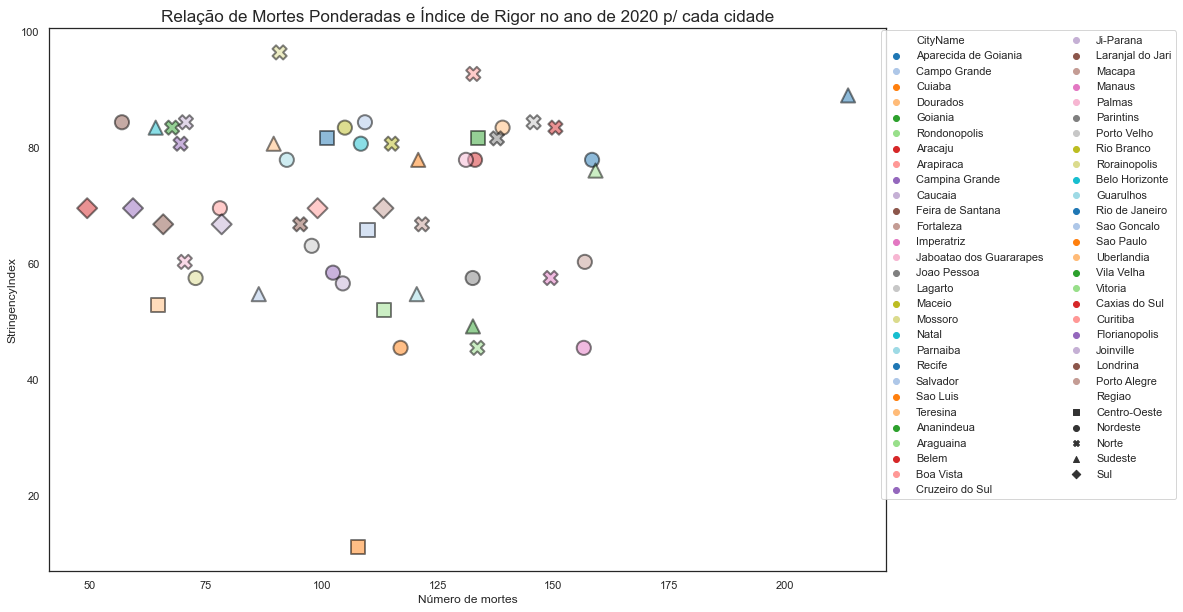

In [115]:
import seaborn as sns

temp = df_tot_ano.loc[df_tot_ano['Date'] == '2020']
temp = temp.loc[temp['StringencyIndex'] > 0]
temp = temp.sort_values(by=['Regiao', 'CityName'])

sns.set(rc={"figure.figsize":(15, 10)})
sns.set_theme(style="white")

p = sns.scatterplot(data=temp, \
    x='Morte ponderada por 100 mil', y='StringencyIndex', \
        hue='CityName', palette='tab20', alpha=0.5, s=200, \
            style='Regiao', markers=['s','o','X','^','D'], \
                linewidth=2, edgecolor='black')

#p.set_yticks(range(0,54,1))
#p.set_xticks(range(1,119,1))
p.legend(loc='upper center', bbox_to_anchor=(1.17, 1.005), ncol=2)
p.set_ylabel('StringencyIndex')
p.set_xlabel('Número de mortes')
p.set_facecolor('white')
p.set_title('Relação de Mortes Ponderadas e Índice de Rigor no ano de 2020 p/ cada cidade', fontsize=17)

Text(0.5, 1.0, 'Relação de Mortes Ponderadas e Índice de Rigor no ano de 2021 p/ cada cidade')

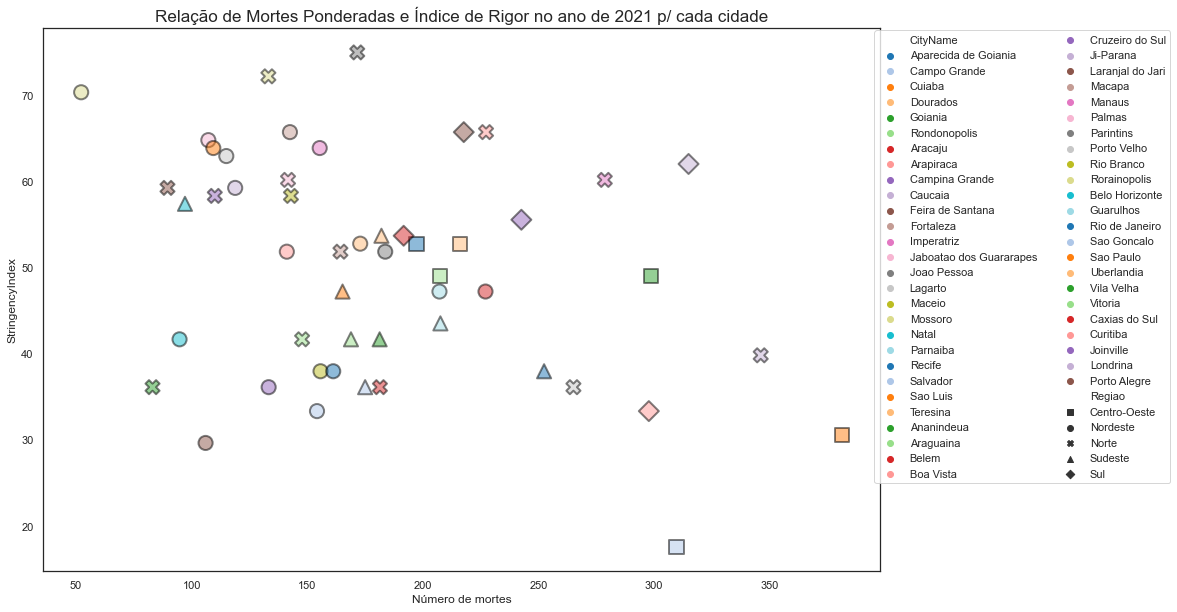

In [116]:
#Ta sem 3 cidades pq estão com indicadores nulos
temp = df_tot_ano.loc[df_tot_ano['Date'] == '2021']
temp = temp.loc[temp['StringencyIndex'] > 0]
temp = temp.sort_values(by=['Regiao', 'CityName'])

sns.set(rc={"figure.figsize":(15, 10)})
sns.set_theme(style="white")

p = sns.scatterplot(data=temp, \
    x='Morte ponderada por 100 mil', y='StringencyIndex', \
        hue='CityName', palette='tab20', alpha=0.5, s=200, \
            style='Regiao', markers=['s','o','X','^','D'], \
                linewidth=2, edgecolor='black')

#p.set_yticks(range(0,54,1))
#p.set_xticks(range(1,119,1))
p.legend(loc='upper center', bbox_to_anchor=(1.17, 1.005), ncol=2)
p.set_ylabel('StringencyIndex')
p.set_xlabel('Número de mortes')
p.set_facecolor('white')
p.set_title('Relação de Mortes Ponderadas e Índice de Rigor no ano de 2021 p/ cada cidade', fontsize=17)

## semana

In [40]:
df_tot_sem = pd.merge(df_pol_semana, df_mor, on=['CityName', 'Date'])
df_tot_sem

CityName       Date  C1_School closing  C1_Flag  \
0               Ananindeua 2020-01-05                0.0     -1.0   
1     Aparecida de Goiania 2020-01-05                0.0     -1.0   
2                  Aracaju 2020-01-05                0.0     -1.0   
3                Araguaina 2020-01-05                0.0     -1.0   
4                Arapiraca 2020-01-05                0.0     -1.0   
...                    ...        ...                ...      ...   
6313             Sao Paulo 2022-03-27               -1.0     -1.0   
6314              Teresina 2022-03-27               -1.0     -1.0   
6315            Uberlandia 2022-03-27               -1.0     -1.0   
6316            Vila Velha 2022-03-27               -1.0     -1.0   
6317               Vitoria 2022-03-27               -1.0     -1.0   

      C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                      0.0     -1.0                      0.0     -1.0   
1                      0.0     -1.0                      0.0     -1.0   
2                      0.0     -1.0                      0.0     -1.0   
3                      0.0     -1.0                      0.0     -1.0   
4                      0.0     -1.0                      0.0     -1.0   
...                    ...      ...                      ...      ...   
6313                  -1.0     -1.0                     -1.0     -1.0   
6314                  -1.0     -1.0                     -1.0     -1.0   
6315                  -1.0     -1.0                     -1.0     -1.0   
6316                  -1.0     -1.0                     -1.0     -1.0   
6317                  -1.0     -1.0                     -1.0     -1.0   

      C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
0                               0.0     -1.0                        0.0   
1                               0.0     -1.0                        0.0   
2                               0.0     -1.0                        0.0   
3                               0.0     -1.0                        0.0   
4                               0.0     -1.0                        0.0   
...                             ...      ...                        ...   
6313                           -1.0     -1.0                       -1.0   
6314                           -1.0     -1.0                       -1.0   
6315                           -1.0     -1.0                       -1.0   
6316                           -1.0     -1.0                       -1.0   
6317                           -1.0     -1.0                       -1.0   

      C5_Flag  C6_Stay at home requirements  C6_Flag  \
0        -1.0                           0.0     -1.0   
1        -1.0                           0.0     -1.0   
2        -1.0                           0.0     -1.0   
3        -1.0                           0.0     -1.0   
4        -1.0                           0.0     -1.0   
...       ...                           ...      ...   
6313     -1.0                          -1.0     -1.0   
6314     -1.0                          -1.0     -1.0   
6315     -1.0                          -1.0     -1.0   
6316     -1.0                          -1.0     -1.0   
6317     -1.0                          -1.0     -1.0   

      C7_Restrictions on internal movement  C7_Flag  \
0                                      0.0     -1.0   
1                                      0.0     -1.0   
2                                      0.0     -1.0   
3                                      0.0     -1.0   
4                                      0.0     -1.0   
...                                    ...      ...   
6313                                  -1.0     -1.0   
6314                                  -1.0     -1.0   
6315                                  -1.0     -1.0   
6316                                  -1.0     -1.0   
6317                                  -1.0     -1.0   

      C8_International travel controls  E1_Income support  E1_Flag  \
0      

In [41]:
df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2021]
#df_tot_sem.loc[df_tot_sem['CityName'] == 'Cuiaba']['Regiao']

CityName       Date  C1_School closing  C1_Flag  \
2808            Ananindeua 2021-01-03                2.0      1.0   
2809  Aparecida de Goiania 2021-01-03                2.0      1.0   
2810               Aracaju 2021-01-03                2.0      1.0   
2811             Araguaina 2021-01-03                2.0      1.0   
2812             Arapiraca 2021-01-03                2.0      1.0   
...                    ...        ...                ...      ...   
5611             Sao Paulo 2021-12-26                1.0      1.0   
5612              Teresina 2021-12-26                1.0      1.0   
5613            Uberlandia 2021-12-26                1.0      1.0   
5614            Vila Velha 2021-12-26                1.0      1.0   
5615               Vitoria 2021-12-26                1.0      1.0   

      C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
2808                   2.0      1.0                      2.0      1.0   
2809                   2.0      1.0                      1.0      1.0   
2810                   1.0      1.0                      1.0      1.0   
2811                   1.0      1.0                      2.0      1.0   
2812                   2.0      1.0                      1.0      1.0   
...                    ...      ...                      ...      ...   
5611                   1.0      1.0                      2.0      1.0   
5612                   1.0      1.0                      1.0      1.0   
5613                   1.0      1.0                      1.0      1.0   
5614                   1.0      1.0                      1.0      1.0   
5615                   1.0      1.0                      1.0      1.0   

      C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
2808                            2.0      1.0                        1.0   
2809                            2.0      1.0                        1.0   
2810                            2.0      1.0                        1.0   
2811                            4.0      1.0                        0.0   
2812                            3.0      1.0                        1.0   
...                             ...      ...                        ...   
5611                            1.0      1.0                        1.0   
5612                            2.0      1.0                        0.0   
5613                            0.0     -1.0                        0.0   
5614                            2.0      1.0                        1.0   
5615                            2.0      1.0                        1.0   

      C5_Flag  C6_Stay at home requirements  C6_Flag  \
2808      1.0                           1.0      1.0   
2809      1.0                           1.0      1.0   
2810      1.0                           1.0      1.0   
2811     -1.0                           1.0      1.0   
2812      1.0                           1.0      1.0   
...       ...                           ...      ...   
5611      1.0                           0.0     -1.0   
5612     -1.0                           0.0     -1.0   
5613     -1.0                           0.0     -1.0   
5614      1.0                           1.0      1.0   
5615      1.0                           1.0      1.0   

      C7_Restrictions on internal movement  C7_Flag  \
2808                                   0.0     -1.0   
2809                                   0.0     -1.0   
2810                                   0.0     -1.0   
2811                                   0.0     -1.0   
2812                                   0.0     -1.0   
...                                    ...      ...   
5611                                   0.0     -1.0   
5612                                   0.0     -1.0   
5613                                   0.0     -1.0   
5614                                   0.0     -1.0   
5615                                   0.0     -1.0   

      C8_International travel controls  E1_Income support  E1_Flag  \
2808   

In [117]:
temp = df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2020]
temp = temp.loc[temp['StringencyIndex'] > 0]
temp = temp.sort_values(by=['Regiao','CityName'])

sns.set(rc={"figure.figsize":(40, 50)})
sns.set_theme(style="white")
sns.set(font_scale=3)

p = sns.scatterplot(data=temp, \
    x='Date', y='StringencyIndex', \
        hue='CityName', palette='tab20', alpha=0.5, s=150, \
            style='Regiao', markers=['s','o','X','^','D'], \
                linewidth=2, edgecolor='black')

p.legend(loc='upper center', bbox_to_anchor=(1.2, 1), fontsize=27, ncol=2)
p.set_ylabel('StringencyIndex', fontsize=32)
p.set_xlabel('Datas/por semana', fontsize=32)
p.set_facecolor('white')
p.set_title('Relação do Índice de Rigor por semana no ano de 2020 p/ cada cidade', fontsize=57)



Text(0.5, 1.0, 'Relação do Índice de Rigor por semana no ano de 2020 p/ cada cidade')

In [119]:
df_tot_sem.loc[df_tot_sem['CityName'] == 'Cuiaba']

CityName       Date  C1_School closing  C1_Flag  C2_Workplace closing  \
14     Cuiaba 2020-01-05                0.0     -1.0                   0.0   
68     Cuiaba 2020-01-12                0.0     -1.0                   0.0   
122    Cuiaba 2020-01-19                0.0     -1.0                   0.0   
176    Cuiaba 2020-01-26                0.0     -1.0                   0.0   
230    Cuiaba 2020-02-02                0.0     -1.0                   0.0   
284    Cuiaba 2020-02-09                0.0     -1.0                   0.0   
338    Cuiaba 2020-02-16                0.0     -1.0                   0.0   
392    Cuiaba 2020-02-23                0.0     -1.0                   0.0   
446    Cuiaba 2020-03-01                0.0     -1.0                   0.0   
500    Cuiaba 2020-03-08                0.0     -1.0                   0.0   
554    Cuiaba 2020-03-15                0.0     -1.0                   0.0   
608    Cuiaba 2020-03-22                0.0     -1.0                   1.0   
662    Cuiaba 2020-03-29                2.0      1.0                   3.0   
716    Cuiaba 2020-04-05                3.0      1.0                   3.0   
770    Cuiaba 2020-04-12                3.0      1.0                   3.0   
824    Cuiaba 2020-04-19                3.0      1.0                   3.0   
878    Cuiaba 2020-04-26                3.0      1.0                   3.0   
932    Cuiaba 2020-05-03                3.0      1.0                   2.0   
986    Cuiaba 2020-05-10                3.0      1.0                   1.0   
1040   Cuiaba 2020-05-17                3.0      1.0                   0.0   
1094   Cuiaba 2020-05-24                3.0      1.0                   0.0   
1148   Cuiaba 2020-05-31                3.0      1.0                   0.0   
1202   Cuiaba 2020-06-07                3.0      1.0                   0.0   
1256   Cuiaba 2020-06-14                3.0      1.0                   0.0   
1310   Cuiaba 2020-06-21                3.0      1.0                   0.0   
1364   Cuiaba 2020-06-28                3.0      1.0                   3.0   
1418   Cuiaba 2020-07-05                3.0      1.0                   3.0   
1472   Cuiaba 2020-07-12                3.0      1.0                   3.0   
1526   Cuiaba 2020-07-19                3.0      1.0                   3.0   
1580   Cuiaba 2020-07-26                3.0      1.0                   3.0   
1634   Cuiaba 2020-08-02                3.0      1.0                   0.0   
1688   Cuiaba 2020-08-09                3.0      1.0                   0.0   
1742   Cuiaba 2020-08-16                3.0      1.0                   0.0   
1796   Cuiaba 2020-08-23                3.0      1.0                   0.0   
1850   Cuiaba 2020-08-30                3.0      1.0                   0.0   
1904   Cuiaba 2020-09-06                3.0      1.0                   0.0   
1958   Cuiaba 2020-09-13                2.0      1.0                   0.0   
2012   Cuiaba 2020-09-20                2.0      1.0                   0.0   
2066   Cuiaba 2020-09-27                2.0      1.0                   0.0   
2120   Cuiaba 2020-10-04                2.0      1.0                   0.0   
2174   Cuiaba 2020-10-11                2.0      1.0                   0.0   
2228   Cuiaba 2020-10-18                2.0      1.0                   1.0   
2282   Cuiaba 2020-10-25                2.0      1.0                   1.0   
2336   Cuiaba 2020-11-01                2.0      1.0                   1.0   
2390   Cuiaba 2020-11-08                2.0      1.0                   1.0   
2444   Cuiaba 2020-11-15                2.0      1.0                   1.0   
2498   Cuiaba 2020-11-22                2.0      1.0                   1.0   
2552   Cuiaba 2020-11-29                2.0      1.0                   1.0   
2606   Cuiaba 2020-12-06                2.0      1.0                   1.0   
2660   Cuiaba 2020-12-13                2.0      1.0                   1.0   
2714   Cuiaba 2020-12-20   

Text(0.5, 1.0, 'Relação do Índice de Rigor por semana no ano de 2021 p/ cada cidade')

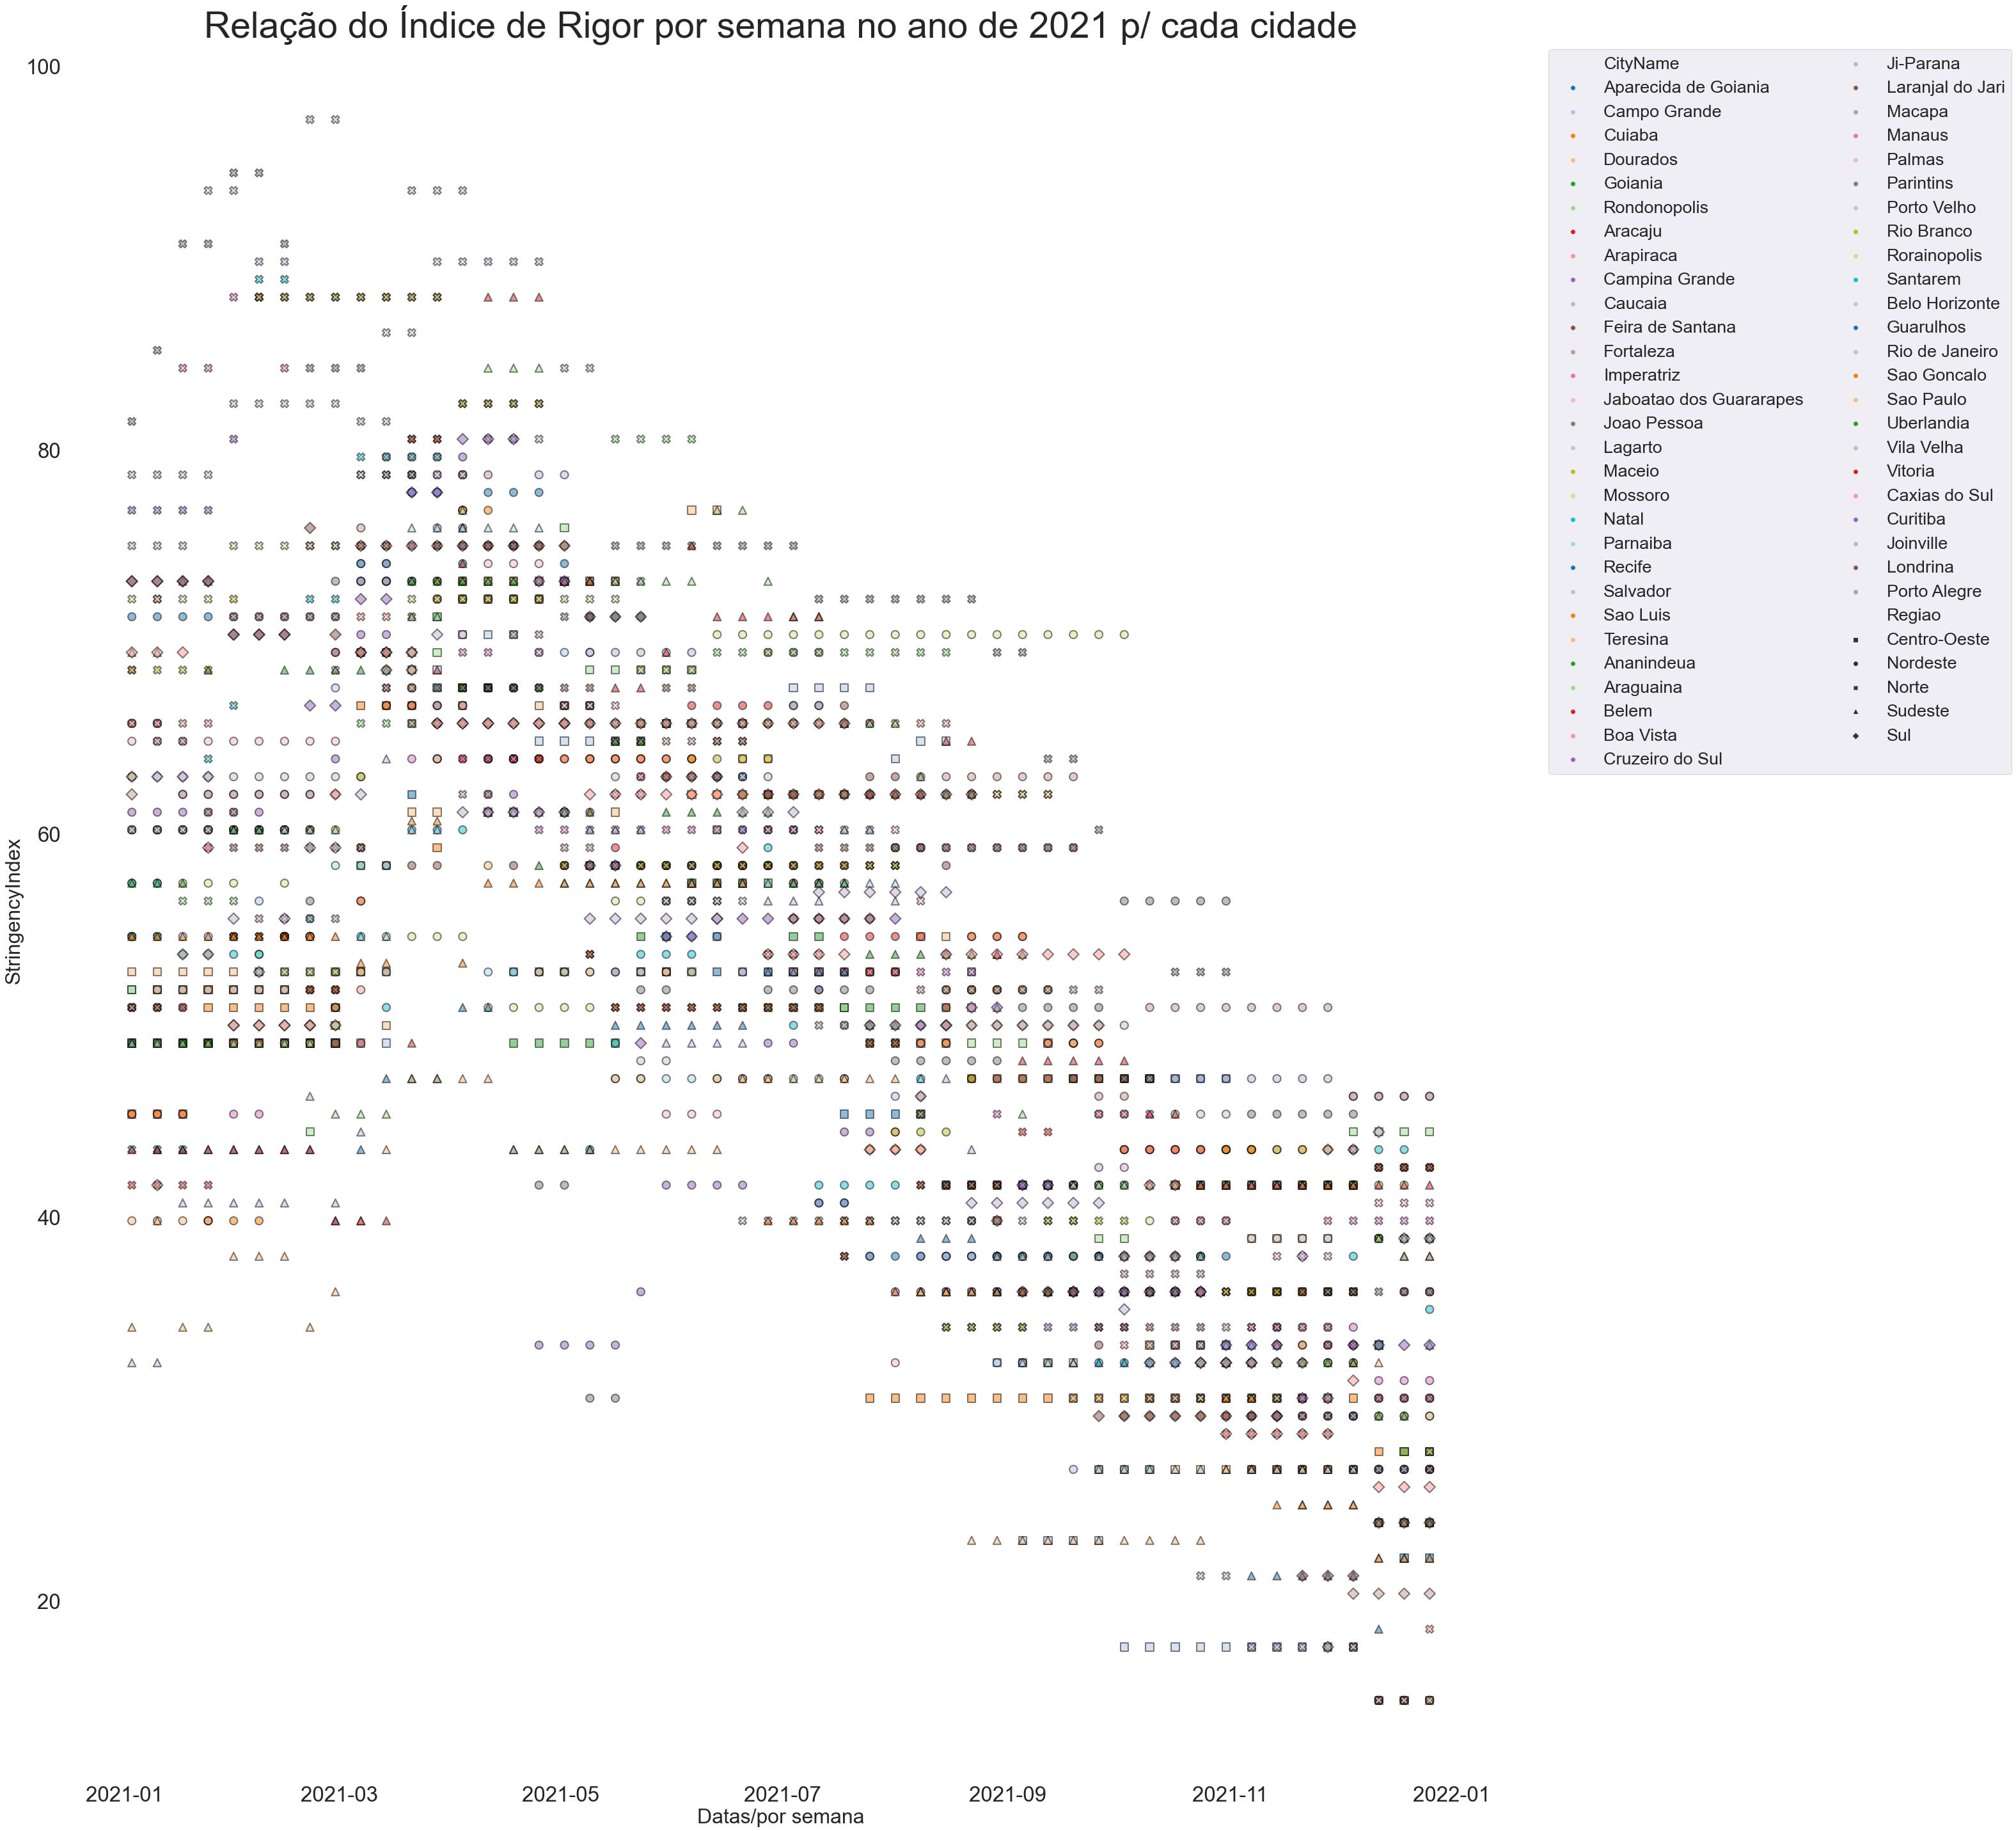

In [118]:
#Ta sem 3 cidades pq estão com indicadores nulos
temp = df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2021]
temp = temp.loc[temp['StringencyIndex'] > 0]
temp = temp.sort_values(by=['Regiao','CityName'])

sns.set(rc={"figure.figsize":(40, 50)})
sns.set_theme(style="white")
sns.set(font_scale=3)

p = sns.scatterplot(data=temp, \
    x='Date', y='StringencyIndex', \
        hue='CityName', palette='tab20', alpha=0.5, s=150, \
            style='Regiao', markers=['s','o','X','^','D'], \
                linewidth=2, edgecolor='black')

p.legend(loc='upper center', bbox_to_anchor=(1.2, 1), fontsize=27, ncol=2)
p.set_ylabel('StringencyIndex', fontsize=32)
p.set_xlabel('Datas/por semana', fontsize=32)
p.set_facecolor('white')
p.set_title('Relação do Índice de Rigor por semana no ano de 2021 p/ cada cidade', fontsize=57)

In [44]:
print(str(len(df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2020])))
print(str(len(df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2021])))
print(str(len(df_tot_sem.loc[df_tot_sem['Date'].dt.year == 2022])))

df_tot_sem#.loc[df_tot['Date'].dt.year == 2021]
        
#df_tot.loc[df_tot['SemanaEpidemiologica'] == 1]

2808
2808
702


CityName       Date  C1_School closing  C1_Flag  \
0               Ananindeua 2020-01-05                0.0     -1.0   
1     Aparecida de Goiania 2020-01-05                0.0     -1.0   
2                  Aracaju 2020-01-05                0.0     -1.0   
3                Araguaina 2020-01-05                0.0     -1.0   
4                Arapiraca 2020-01-05                0.0     -1.0   
...                    ...        ...                ...      ...   
6313             Sao Paulo 2022-03-27               -1.0     -1.0   
6314              Teresina 2022-03-27               -1.0     -1.0   
6315            Uberlandia 2022-03-27               -1.0     -1.0   
6316            Vila Velha 2022-03-27               -1.0     -1.0   
6317               Vitoria 2022-03-27               -1.0     -1.0   

      C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                      0.0     -1.0                      0.0     -1.0   
1                      0.0     -1.0                      0.0     -1.0   
2                      0.0     -1.0                      0.0     -1.0   
3                      0.0     -1.0                      0.0     -1.0   
4                      0.0     -1.0                      0.0     -1.0   
...                    ...      ...                      ...      ...   
6313                  -1.0     -1.0                     -1.0     -1.0   
6314                  -1.0     -1.0                     -1.0     -1.0   
6315                  -1.0     -1.0                     -1.0     -1.0   
6316                  -1.0     -1.0                     -1.0     -1.0   
6317                  -1.0     -1.0                     -1.0     -1.0   

      C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
0                               0.0     -1.0                        0.0   
1                               0.0     -1.0                        0.0   
2                               0.0     -1.0                        0.0   
3                               0.0     -1.0                        0.0   
4                               0.0     -1.0                        0.0   
...                             ...      ...                        ...   
6313                           -1.0     -1.0                       -1.0   
6314                           -1.0     -1.0                       -1.0   
6315                           -1.0     -1.0                       -1.0   
6316                           -1.0     -1.0                       -1.0   
6317                           -1.0     -1.0                       -1.0   

      C5_Flag  C6_Stay at home requirements  C6_Flag  \
0        -1.0                           0.0     -1.0   
1        -1.0                           0.0     -1.0   
2        -1.0                           0.0     -1.0   
3        -1.0                           0.0     -1.0   
4        -1.0                           0.0     -1.0   
...       ...                           ...      ...   
6313     -1.0                          -1.0     -1.0   
6314     -1.0                          -1.0     -1.0   
6315     -1.0                          -1.0     -1.0   
6316     -1.0                          -1.0     -1.0   
6317     -1.0                          -1.0     -1.0   

      C7_Restrictions on internal movement  C7_Flag  \
0                                      0.0     -1.0   
1                                      0.0     -1.0   
2                                      0.0     -1.0   
3                                      0.0     -1.0   
4                                      0.0     -1.0   
...                                    ...      ...   
6313                                  -1.0     -1.0   
6314                                  -1.0     -1.0   
6315                                  -1.0     -1.0   
6316                                  -1.0     -1.0   
6317                                  -1.0     -1.0   

      C8_International travel controls  E1_Income support  E1_Flag  \
0      

# Correlações

# 2020

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_2020 = df_tot_ano.loc[df_tot_ano['Date'] == '2020']
corr_2020 = corr_2020[['Morte ponderada por 100 mil','C1_School closing','C2_Workplace closing', 'C3_Cancel public events',\
       'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', \
       'C7_Restrictions on internal movement','C8_International travel controls', 'E1_Income support',\
       'E2_Debt/contract relief', 'E3_Fiscal measures','E4_International support', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing',\
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'H7_Vaccination policy', \
       'H8_Protection of elderly people', 'V1_Vaccine Prioritisation', 'V2_Vaccine Availability', 'V3_Vaccine Financial Support', 'V4_Mandatory Vaccination',\
       'StringencyIndex', 'GovernmentResponseIndex','ContainmentHealthIndex','EconomicSupportIndex', 'Regiao']]

corr_2020 = corr_2020.replace([-1], np.nan)

corr_2020 = corr_2020.corr().dropna(axis=0, how='all')
corr_2020 = corr_2020.dropna(axis=1, how='all')
corr_2020.head()

Morte ponderada por 100 mil  C1_School closing  \
Morte ponderada por 100 mil                       1.000000           0.043669   
C1_School closing                                 0.043669           1.000000   
C2_Workplace closing                             -0.042805           0.116667   
C3_Cancel public events                          -0.052616          -0.056580   
C4_Restrictions on gatherings                    -0.123214           0.019769   

                               C2_Workplace closing  C3_Cancel public events  \
Morte ponderada por 100 mil               -0.042805                -0.052616   
C1_School closing                          0.116667                -0.056580   
C2_Workplace closing                       1.000000                 0.168325   
C3_Cancel public events                    0.168325                 1.000000   
C4_Restrictions on gatherings              0.320125                 0.086322   

                               C4_Restrictions on gatherings  \
Morte ponderada por 100 mil                        -0.123214   
C1_School closing                                   0.019769   
C2_Workplace closing                                0.320125   
C3_Cancel public events                             0.086322   
C4_Restrictions on gatherings                       1.000000   

                               C5_Close public transport  \
Morte ponderada por 100 mil                    -0.309110   
C1_School closing                               0.174608   
C2_Workplace closing                            0.112913   
C3_Cancel public events                        -0.062239   
C4_Restrictions on gatherings                  -0.131928   

                               C6_Stay at home requirements  \
Morte ponderada por 100 mil                       -0.243596   
C1_School closing                                  0.039621   
C2_Workplace closing                              -0.077042   
C3_Cancel public events                            0.027462   
C4_Restrictions on gatherings                      0.295529   

                               C7_Restrictions on internal movement  \
Morte ponderada por 100 mil                               -0.308966   
C1_School closing                                          0.136747   
C2_Workplace closing                                       0.260225   
C3_Cancel public events                                   -0.016850   
C4_Restrictions on gatherings                              0.115097   

                               C8_International travel controls  \
Morte ponderada por 100 mil                           -0.078946   
C1_School closing                                     -0.121508   
C2_Workplace closing                                   0.144555   
C3_Cancel public events                                0.104383   
C4_Restrictions on gatherings                          0.086536   

                               E1_Income support  E2_Debt/contract relief  \
Morte ponderada por 100 mil             0.185139                 0.058741   
C1_School closing                       0.071429                 0.089363   
C2_Workplace closing                    0.136006                 0.222822   
C3_Cancel public events                 0.057735                 0.072232   
C4_Restrictions on gatherings           0.194410                -0.020269   

                               H2_Testing policy  \
Morte ponderada por 100 mil             0.101746   
C1_School closing                       0.039621   
C2_Workplace closing                    0.004623   
C3_Cancel public events                 0.027462   
C4_Restrictions on gatherings           0.092113   

                               H8_Protection of elderly people  \
Morte ponderada por 100 mil                           0.154342   
C1_School closing                                    -0.299782   
C2_Workplace closing                                 -0.149580   
C3_Cancel public events                              -0.147619   
C4

In [61]:
plt.figure(figsize=(50, 30))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_2020, dtype=np.bool))
heatmap = sns.heatmap(corr_2020, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dos indicadores e morte ponderada no ano de 2020', fontdict={'fontsize':69}, pad=16);

C:\Users\edupo\AppData\Local\Temp\ipykernel_13692\3536765585.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_2020, dtype=np.bool))


# 2021

In [56]:
corr_2021 = df_tot_ano.loc[df_tot_ano['Date'] == '2021']
corr_2021 = corr_2021[['Morte ponderada por 100 mil','C1_School closing','C2_Workplace closing', 'C3_Cancel public events',\
       'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', \
       'C7_Restrictions on internal movement','C8_International travel controls', 'E1_Income support',\
       'E2_Debt/contract relief', 'E3_Fiscal measures','E4_International support', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing',\
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'H7_Vaccination policy', \
       'H8_Protection of elderly people', 'V1_Vaccine Prioritisation', 'V2_Vaccine Availability', 'V3_Vaccine Financial Support', 'V4_Mandatory Vaccination',\
       'StringencyIndex', 'GovernmentResponseIndex','ContainmentHealthIndex','EconomicSupportIndex', 'Regiao']]

corr_2021 = corr_2021.replace([-1], np.nan)

corr_2021 = corr_2021.corr().dropna(axis=0, how='all')
corr_2021 = corr_2021.dropna(axis=1, how='all')
corr_2021.head()

Morte ponderada por 100 mil  C1_School closing  \
Morte ponderada por 100 mil                       1.000000          -0.280191   
C1_School closing                                -0.280191           1.000000   
C2_Workplace closing                             -0.263319          -0.257530   
C3_Cancel public events                          -0.079215          -0.040085   
C4_Restrictions on gatherings                     0.116520          -0.383187   

                               C2_Workplace closing  C3_Cancel public events  \
Morte ponderada por 100 mil               -0.263319                -0.079215   
C1_School closing                         -0.257530                -0.040085   
C2_Workplace closing                       1.000000                 0.210846   
C3_Cancel public events                    0.210846                 1.000000   
C4_Restrictions on gatherings              0.194658                 0.247162   

                               C4_Restrictions on gatherings  \
Morte ponderada por 100 mil                         0.116520   
C1_School closing                                  -0.383187   
C2_Workplace closing                                0.194658   
C3_Cancel public events                             0.247162   
C4_Restrictions on gatherings                       1.000000   

                               C5_Close public transport  \
Morte ponderada por 100 mil                    -0.165165   
C1_School closing                              -0.027995   
C2_Workplace closing                            0.051218   
C3_Cancel public events                        -0.025810   
C4_Restrictions on gatherings                   0.269709   

                               C6_Stay at home requirements  \
Morte ponderada por 100 mil                        0.011849   
C1_School closing                                  0.133295   
C2_Workplace closing                               0.025738   
C3_Cancel public events                            0.017889   
C4_Restrictions on gatherings                      0.009103   

                               C7_Restrictions on internal movement  \
Morte ponderada por 100 mil                               -0.046611   
C1_School closing                                          0.313665   
C2_Workplace closing                                      -0.052273   
C3_Cancel public events                                   -0.181098   
C4_Restrictions on gatherings                             -0.107414   

                               E1_Income support  E2_Debt/contract relief  \
Morte ponderada por 100 mil            -0.022016                 0.316879   
C1_School closing                      -0.108696                -0.156955   
C2_Workplace closing                    0.169887                 0.125017   
C3_Cancel public events                -0.065854                 0.190185   
C4_Restrictions on gatherings           0.009574                 0.146031   

                               H2_Testing policy  H7_Vaccination policy  \
Morte ponderada por 100 mil             0.183706              -0.244409   
C1_School closing                      -0.316600               0.287860   
C2_Workplace closing                    0.273774               0.059712   
C3_Cancel public events                 0.070298              -0.171945   
C4_Restrictions on gatherings           0.053020              -0.064060   

                               H8_Protection of elderly people  \
Morte ponderada por 100 mil                           0.175344   
C1_School closing                                    -0.108876   
C2_Workplace closing                                  0.004618   
C3_Cancel public events                               0.130331   
C4_Restrictions on gatherings                         0.168847   

                               StringencyIndex  GovernmentResponseIndex  \
Morte ponderada por 100 mil          -0.335673                -0.232985   
C1_School closing                     0.226102    

In [62]:
plt.figure(figsize=(50, 30))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_2021, dtype=np.bool))
heatmap = sns.heatmap(corr_2021, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dos indicadores e morte ponderada no ano de 2021', fontdict={'fontsize':69}, pad=16);

C:\Users\edupo\AppData\Local\Temp\ipykernel_13692\676774567.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_2021, dtype=np.bool))


# difere

In [3]:
#Drop os indicadores que não serão utilizados
df = df.drop(columns=['C1_School closing', 'C1_Flag', 'C1_Notes', 'C2_Workplace closing', 'C2_Flag', 'C2_Notes', 'C3_Cancel public events', 'C3_Flag', 'C3_Notes', 'C4_Restrictions on gatherings', 'C4_Flag', 'C4_Notes', 'C5_Close public transport', 'C5_Flag', 'C5_Notes', 'C6_Stay at home requirements', 'C6_Flag', 'C6_Notes', 'C7_Restrictions on internal movement', 'C7_Flag', 'C7_Notes', 'C8_International travel controls', 'C8_Notes', 'E1_Income support', 'E1_Flag', 'E1_Notes', 'E2_Debt/contract relief', 'E2_Notes', 'E3_Fiscal measures', 'E3_Notes', 'E4_International support', 'E4_Notes', 'M1_Wildcard', 'M1_Notes', 'V1_Vaccine Prioritisation', 'V1_Notes', 'V2_Vaccine Availability', 'V2_Notes', 'V3_Vaccine Financial Support', 'V3_Notes', 'V4_Mandatory Vaccination', 'V4_Notes'])

#drop todas linhas que tem todos os indicadores NaN
#df.dropna(axis=0, how='all', subset=['H1_Public information campaigns', 'H1_Flag', 'H1_Notes', \
#        'H2_Testing policy', 'H2_Notes', 'H3_Contact tracing', 'H3_Notes', 'H4_Emergency investment in healthcare', 'H4_Notes', 'H5_Investment in vaccines', 'H5_Notes', \
#        'H6_Facial Coverings', 'H6_Flag', 'H6_Notes', 'H7_Vaccination policy', 'H7_Flag', 'H7_Notes', 'H8_Protection of elderly people', 'H8_Flag', 'H8_Notes'], inplace=True)

#Drop colunas que não estão sendo utilizadas no momento
df = df.drop(columns=['CountryName', 'CountryCode', 'RegionCode', 'CityCode'])

In [4]:
#Retira as entradas referentes ao Governo Federal e aos Estados
df.dropna(axis=0, how='any', subset=['CityName'], inplace=True)

In [5]:
#Remoção dos 'NaN' em 'RegionName' e 'CityName' para aprimorar a separação por cidades futuramente
#Toda Entry que está com NaN em 'RegionName' diz respeito ao governo
#df.RegionName = df.RegionName.fillna('Governo Federal')

#Toda Entry que está com NaN em 'CityName' diz respeito ao estado ou ao governo federal
#df.CityName = df.CityName.fillna(df.RegionName)

df

RegionName         CityName Jurisdiction      Date  \
4105         Acre  Cruzeiro do Sul     CITY_GOV  20200101   
4106         Acre  Cruzeiro do Sul     CITY_GOV  20200102   
4107         Acre  Cruzeiro do Sul     CITY_GOV  20200103   
4108         Acre  Cruzeiro do Sul     CITY_GOV  20200104   
4109         Acre  Cruzeiro do Sul     CITY_GOV  20200105   
...           ...              ...          ...       ...   
201140  Tocantins           Palmas    CITY_WIDE  20220327   
201141  Tocantins           Palmas    CITY_WIDE  20220328   
201142  Tocantins           Palmas    CITY_WIDE  20220329   
201143  Tocantins           Palmas    CITY_WIDE  20220330   
201144  Tocantins           Palmas    CITY_WIDE  20220331   

        H1_Public information campaigns  H1_Flag H1_Notes  H2_Testing policy  \
4105                                0.0      NaN      NaN                0.0   
4106                                0.0      NaN      NaN                0.0   
4107                                0.0      NaN      NaN                0.0   
4108                                0.0      NaN      NaN                0.0   
4109                                0.0      NaN      NaN                0.0   
...                                 ...      ...      ...                ...   
201140                              NaN      NaN      NaN                NaN   
201141                              NaN      NaN      NaN                NaN   
201142                              NaN      NaN      NaN                NaN   
201143                              NaN      NaN      NaN                NaN   
201144                              NaN      NaN      NaN                NaN   

       H2_Notes  H3_Contact tracing H3_Notes  \
4105        NaN                 0.0      NaN   
4106        NaN                 0.0      NaN   
4107        NaN                 0.0      NaN   
4108        NaN                 0.0      NaN   
4109        NaN                 0.0      NaN   
...         ...                 ...      ...   
201140      NaN                 NaN      NaN   
201141      NaN                 NaN      NaN   
201142      NaN                 NaN      NaN   
201143      NaN                 NaN      NaN   
201144      NaN                 NaN      NaN   

        H4_Emergency investment in healthcare H4_Notes  \
4105                                      NaN      NaN   
4106                                      NaN      NaN   
4107                                      NaN      NaN   
4108                                      NaN      NaN   
4109                                      NaN      NaN   
...                                       ...      ...   
201140                                    NaN      NaN   
201141                                    NaN      NaN   
201142                                    NaN      NaN   
201143                                    NaN      NaN   
201144                                    NaN      NaN   

        H5_Investment in vaccines H5_Notes  H6_Facial Coverings  H6_Flag  \
4105                          NaN      NaN                  0.0      NaN   
4106                          NaN      NaN                  0.0      NaN   
4107                          NaN      NaN                  0.0      NaN   
4108                          NaN      NaN                  0.0      NaN   
4109                          NaN      NaN                  0.0      NaN   
...                           ...      ...                  ...      ...   
201140                        NaN      NaN                  NaN      NaN   
201141                        NaN      NaN                  NaN      NaN   
201142                        NaN      NaN                  NaN      NaN   
201143                        NaN      NaN                  NaN      NaN   
201144                        NaN      NaN                  NaN      NaN   

       H6_Notes  H7_Vaccination policy  H7_Flag H7_Notes  \
4105        NaN                    0.0      NaN      NaN   
4106  

In [6]:
df_h6 = df[['CityName', 'Jurisdiction', 'Date', 'H6_Facial Coverings', 'H6_Flag', 'H6_Notes']]

In [7]:
#H: Health system policies

df_h1 = df.dropna(axis=0, how='all', subset=['H1_Public information campaigns', 'H1_Flag', 'H1_Notes'])
df_h2 = df.dropna(axis=0, how='all', subset=['H2_Testing policy', 'H2_Notes'])
df_h3 = df.dropna(axis=0, how='all', subset=['H3_Contact tracing', 'H3_Notes'])
df_h4 = df.dropna(axis=0, how='all', subset=['H4_Emergency investment in healthcare', 'H4_Notes'])
df_h5 = df.dropna(axis=0, how='all', subset=['H5_Investment in vaccines', 'H5_Notes'])
df_h6 = df.dropna(axis=0, how='all', subset=['H6_Facial Coverings', 'H6_Flag', 'H6_Notes'])
df_h7 = df.dropna(axis=0, how='all', subset=['H7_Vaccination policy', 'H7_Flag', 'H7_Notes'])
df_h8 = df.dropna(axis=0, how='all', subset=['H8_Protection of elderly people', 'H8_Flag', 'H8_Notes'])

print("H's len: " + str(len(df_h1)) + ' | ' + str(len(df_h2)) + ' | ' + str(len(df_h3)) + ' | ' + str(len(df_h4)) + \
    ' | ' + str(len(df_h5)) + ' | ' + str(len(df_h6)) + ' | ' + str(len(df_h7)) + ' | ' + str(len(df_h8)))


H's len: 125713 | 125966 | 125576 | 1233 | 1404 | 124189 | 124618 | 122499


In [8]:
#Release Memory
#del [[df_h1,df_h2,df_h3,df_h4,df_h5,df_h6,df_h7,df_h8]]
del [[df_h1,df_h2,df_h3,df_h4,df_h5,df_h7,df_h8]]
gc.collect()

0

In [9]:
#H6_Facial Coverings: Record policies on the use of facial coverings outside the home
#H6_Flag: 0 - targeted, 1 - general, Blank - no data
import seaborn as sns

df_h6

RegionName         CityName Jurisdiction      Date  \
4105         Acre  Cruzeiro do Sul     CITY_GOV  20200101   
4106         Acre  Cruzeiro do Sul     CITY_GOV  20200102   
4107         Acre  Cruzeiro do Sul     CITY_GOV  20200103   
4108         Acre  Cruzeiro do Sul     CITY_GOV  20200104   
4109         Acre  Cruzeiro do Sul     CITY_GOV  20200105   
...           ...              ...          ...       ...   
201097  Tocantins           Palmas    CITY_WIDE  20220212   
201098  Tocantins           Palmas    CITY_WIDE  20220213   
201099  Tocantins           Palmas    CITY_WIDE  20220214   
201100  Tocantins           Palmas    CITY_WIDE  20220215   
201101  Tocantins           Palmas    CITY_WIDE  20220216   

        H1_Public information campaigns  H1_Flag H1_Notes  H2_Testing policy  \
4105                                0.0      NaN      NaN                0.0   
4106                                0.0      NaN      NaN                0.0   
4107                                0.0      NaN      NaN                0.0   
4108                                0.0      NaN      NaN                0.0   
4109                                0.0      NaN      NaN                0.0   
...                                 ...      ...      ...                ...   
201097                              2.0      1.0      NaN                2.0   
201098                              2.0      1.0      NaN                2.0   
201099                              2.0      1.0      NaN                2.0   
201100                              2.0      1.0      NaN                2.0   
201101                              2.0      1.0      NaN                2.0   

       H2_Notes  H3_Contact tracing H3_Notes  \
4105        NaN                 0.0      NaN   
4106        NaN                 0.0      NaN   
4107        NaN                 0.0      NaN   
4108        NaN                 0.0      NaN   
4109        NaN                 0.0      NaN   
...         ...                 ...      ...   
201097      NaN                 0.0      NaN   
201098      NaN                 0.0      NaN   
201099      NaN                 0.0      NaN   
201100      NaN                 0.0      NaN   
201101      NaN                 0.0      NaN   

        H4_Emergency investment in healthcare H4_Notes  \
4105                                      NaN      NaN   
4106                                      NaN      NaN   
4107                                      NaN      NaN   
4108                                      NaN      NaN   
4109                                      NaN      NaN   
...                                       ...      ...   
201097                                    NaN      NaN   
201098                                    NaN      NaN   
201099                                    NaN      NaN   
201100                                    NaN      NaN   
201101                                    NaN      NaN   

        H5_Investment in vaccines H5_Notes  H6_Facial Coverings  H6_Flag  \
4105                          NaN      NaN                  0.0      NaN   
4106                          NaN      NaN                  0.0      NaN   
4107                          NaN      NaN                  0.0      NaN   
4108                          NaN      NaN                  0.0      NaN   
4109                          NaN      NaN                  0.0      NaN   
...                           ...      ...                  ...      ...   
201097                        NaN      NaN                  4.0      1.0   
201098                        NaN      NaN                  4.0      1.0   
201099                        NaN      NaN                  4.0      1.0   
201100                        NaN      NaN                  4.0      1.0   
201101                        NaN      NaN                  4.0      1.0   

       H6_Notes  H7_Vaccination policy  H7_Flag H7_Notes  \
4105        NaN                    0.0      NaN      NaN   
4106  

In [10]:
#Drop colunas que não serão utilizadas nesta análise
df_h6 = df_h6.drop(columns=['RegionName', 'H1_Public information campaigns', 'H1_Flag', 'H1_Notes', \
       'H2_Testing policy', 'H2_Notes', 'H3_Contact tracing', 'H3_Notes', \
       'H4_Emergency investment in healthcare', 'H4_Notes', \
       'H5_Investment in vaccines', 'H5_Notes','H7_Vaccination policy', 'H7_Flag', 'H7_Notes', \
       'H8_Protection of elderly people', 'H8_Flag', 'H8_Notes', \
       'StringencyIndex', 'StringencyIndexForDisplay', \
       'StringencyLegacyIndex', 'StringencyLegacyIndexForDisplay', \
       'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay', \
       'ContainmentHealthIndex', 'ContainmentHealthIndexForDisplay', \
       'EconomicSupportIndex', 'EconomicSupportIndexForDisplay'])

In [11]:
#Remove City_TOTAL que sempre é nulo, e city_wide q é sempre igual a city_gov
#df_h6 = df_h6[df_h6.Jurisdiction != 'CITY_TOTAL']
#df_h6 = df_h6[df_h6.Jurisdiction != 'CITY_WIDE']
df_h6 = df_h6[df_h6.Jurisdiction.isin(['CITY_TOTAL', 'CITY_WIDE']) == False]

In [12]:
#dropa coluna jurisdiction pq n vai usar mais
df_h6 = df_h6.drop(columns=['Jurisdiction'])

In [13]:
#Converte coluna Date de INT para DATETIME
df_h6['Date'] = pd.to_datetime(df_h6['Date'], format='%Y%m%d')

In [14]:
df_h6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41961 entries, 4105 to 199459
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CityName             41961 non-null  object        
 1   Date                 41961 non-null  datetime64[ns]
 2   H6_Facial Coverings  41961 non-null  float64       
 3   H6_Flag              35403 non-null  float64       
 4   H6_Notes             1261 non-null   object        
 5   ConfirmedCases       29814 non-null  float64       
 6   ConfirmedDeaths      29814 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 2.6+ MB


In [15]:
df_h6 = df_h6.sort_values(by=['Date', 'CityName'])

#Como os NaN são dados interessantes, da replace neles por -1 para identificá-los
df_h6['H6_Facial Coverings'] = df_h6['H6_Facial Coverings'].fillna(-1)

df_h6.head(-1000)

CityName       Date  H6_Facial Coverings  H6_Flag  \
97699             Ananindeua 2020-01-01                  0.0      NaN   
60754   Aparecida de Goiania 2020-01-01                  0.0      NaN   
181441               Aracaju 2020-01-01                  0.0      NaN   
196219             Araguaina 2020-01-01                  0.0      NaN   
11494              Arapiraca 2020-01-01                  0.0      NaN   
...                      ...        ...                  ...      ...   
197004             Araguaina 2022-02-24                  4.0      1.0   
12279              Arapiraca 2022-02-24                  4.0      1.0   
100947                 Belem 2022-02-24                  4.0      1.0   
76317         Belo Horizonte 2022-02-24                  4.0      1.0   
49224               Brasilia 2022-02-24                  4.0      1.0   

       H6_Notes  ConfirmedCases  ConfirmedDeaths  
97699       NaN             NaN              NaN  
60754       NaN             NaN              NaN  
181441      NaN             NaN              NaN  
196219      NaN             NaN              NaN  
11494       NaN             NaN              NaN  
...         ...             ...              ...  
197004      NaN             NaN              NaN  
12279       NaN         35636.0            547.0  
100947      NaN             NaN              NaN  
76317       NaN             NaN              NaN  
49224       NaN        679912.0          11398.0  

[40961 rows x 7 columns]

In [19]:
df_h6.loc[df_h6['Date'].dt.year == 2021]

CityName       Date  H6_Facial Coverings  H6_Flag  \
98065             Ananindeua 2021-01-01                  4.0      1.0   
61120   Aparecida de Goiania 2021-01-01                  4.0      1.0   
181807               Aracaju 2021-01-01                  4.0      1.0   
196585             Araguaina 2021-01-01                  4.0      1.0   
11860              Arapiraca 2021-01-01                  4.0      1.0   
...                      ...        ...                  ...      ...   
192023             Sao Paulo 2021-12-31                  4.0      1.0   
125522              Teresina 2021-12-31                  0.0      NaN   
78725             Uberlandia 2021-12-31                  3.0      1.0   
54095             Vila Velha 2021-12-31                  4.0      1.0   
56558                Vitoria 2021-12-31                  4.0      1.0   

       H6_Notes  ConfirmedCases  ConfirmedDeaths  
98065       NaN         11079.0            387.0  
61120       NaN         40087.0            588.0  
181807      NaN         56161.0            898.0  
196585      NaN         17914.0            240.0  
11860       NaN         13971.0            183.0  
...         ...             ...              ...  
192023      NaN             NaN              NaN  
125522      NaN        110769.0           2615.0  
78725       NaN             NaN              NaN  
54095       NaN             NaN              NaN  
56558       NaN             NaN              NaN  

[18979 rows x 7 columns]

In [ ]:
#df_h6[(df_h6['Date'] == 20220308) & (df_h6['Jurisdiction'].astype('str') == 'CITY_TOTAL')]
print(str(len(df_h6[df_h6['Date'] == '2022-03-08'])))
df_h6[df_h6['Date'] == '2022-03-08']




54


CityName       Date  H6_Facial Coverings  H6_Flag  \
98496                Ananindeua 2022-03-08                  4.0      1.0   
61551      Aparecida de Goiania 2022-03-08                 -1.0      NaN   
182238                  Aracaju 2022-03-08                  4.0      1.0   
197016                Araguaina 2022-03-08                  1.0      1.0   
12291                 Arapiraca 2022-03-08                  4.0      1.0   
100959                    Belem 2022-03-08                  4.0      1.0   
76329            Belo Horizonte 2022-03-08                  2.0      1.0   
160071                Boa Vista 2022-03-08                 -1.0      NaN   
49236                  Brasilia 2022-03-08                  4.0      1.0   
108348           Campina Grande 2022-03-08                  4.0      1.0   
83718              Campo Grande 2022-03-08                  2.0      1.0   
41847                   Caucaia 2022-03-08                  4.0      1.0   
167460            Caxias do Sul 2022-03-08                  2.0      1.0   
4902            Cruzeiro do Sul 2022-03-08                  4.0      1.0   
91107                    Cuiaba 2022-03-08                  2.0      1.0   
130515                 Curitiba 2022-03-08                  3.0      1.0   
86181                  Dourados 2022-03-08                  3.0      1.0   
34458          Feira de Santana 2022-03-08                  4.0      1.0   
174849            Florianopolis 2022-03-08                 -1.0      NaN   
44310                 Fortaleza 2022-03-08                  4.0      1.0   
64014                   Goiania 2022-03-08                 -1.0      NaN   
189627                Guarulhos 2022-03-08                  3.0      1.0   
68940                Imperatriz 2022-03-08                  2.0      1.0   
115737  Jaboatao dos Guararapes 2022-03-08                  4.0      1.0   
152682                Ji-Parana 2022-03-08                 -1.0      NaN   
110811              Joao Pessoa 2022-03-08                  2.0      1.0   
177312                Joinville 2022-03-08                  2.0      1.0   
184701                  Lagarto 2022-03-08                  4.0      1.0   
27069          Laranjal do Jari 2022-03-08                 -1.0      NaN   
132978                 Londrina 2022-03-08                  4.0      1.0   
29532                    Macapa 2022-03-08                 -1.0      NaN   
14754                    Maceio 2022-03-08                  4.0      1.0   
19680                    Manaus 2022-03-08                  2.0      1.0   
145293                  Mossoro 2022-03-08                  0.0      NaN   
147756                    Natal 2022-03-08                  4.0      1.0   
199479                   Palmas 2022-03-08                 -1.0      NaN   
22143                 Parintins 2022-03-08                  2.0      1.0   
123126                 Parnaiba 2022-03-08                 -1.0      NaN   
169923             Porto Alegre 2022-03-08                  2.0      1.0   
155145              Porto Velho 2022-03-08                 -1.0      NaN   
118200                   Recife 2022-03-08                  3.0      1.0   
7365                 Rio Branco 2022-03-08                 -1.0      NaN   
137904           Rio de Janeiro 2022-03-08                  0.0      NaN   
93570              Rondonopolis 2022-03-08                  4.0      1.0   
162534             Rorainopolis 2022-03-08                 -1.0      NaN   
36921                  Salvador 2022-03-08                  4.0      1.0   
103422                 Santarem 2022-03-08                 -1.0      NaN   
140367              Sao Goncalo 2022-03-08                  3.0      1.0   
71403                  Sao Luis 2022-03-08                  4.0      1.0   
192090                Sao Paulo 2022-03-08                  4.0      1.0   
125589                 Teresina 2022-03-08                  3.0      1.0   
78792                Uberlandia 2022-03-08                  4.0      1.

In [21]:
#Separa o dataset em trimestres
trimestres = [part for _, part in df_h6.groupby(pd.Grouper(key='Date',freq='QS'))]

print(str(len(trimestres)))
#trimestres[0][trimestres[0]['CityName'] == 'Dourados']
trimestres[0]

9


CityName       Date  H6_Facial Coverings  H6_Flag  \
97699             Ananindeua 2020-01-01                  0.0      NaN   
60754   Aparecida de Goiania 2020-01-01                  0.0      NaN   
181441               Aracaju 2020-01-01                  0.0      NaN   
196219             Araguaina 2020-01-01                  0.0      NaN   
11494              Arapiraca 2020-01-01                  0.0      NaN   
...                      ...        ...                  ...      ...   
191383             Sao Paulo 2020-03-31                  0.0      NaN   
124882              Teresina 2020-03-31                  0.0      NaN   
78085             Uberlandia 2020-03-31                  0.0      NaN   
53455             Vila Velha 2020-03-31                  0.0      NaN   
55918                Vitoria 2020-03-31                  0.0      NaN   

       H6_Notes  ConfirmedCases  ConfirmedDeaths  
97699       NaN             NaN              NaN  
60754       NaN             NaN              NaN  
181441      NaN             NaN              NaN  
196219      NaN             NaN              NaN  
11494       NaN             NaN              NaN  
...         ...             ...              ...  
191383      NaN          1885.0            121.0  
124882      NaN            16.0              2.0  
78085       NaN            10.0              0.0  
53455       NaN            35.0              0.0  
55918       NaN            28.0              0.0  

[4823 rows x 7 columns]

In [ ]:
#Determina qual o Trimestre que esse grupo representa
trimestres[0]['Date'].dt.to_period('Q').reset_index()['Date']

0       2020Q1
1       2020Q1
2       2020Q1
3       2020Q1
4       2020Q1
         ...  
4909    2020Q1
4910    2020Q1
4911    2020Q1
4912    2020Q1
4913    2020Q1
Name: Date, Length: 4914, dtype: period[Q-DEC]

In [ ]:
#Pega o valor mais comum (moda) do indicador 'H6' para cada cidade em um dado trimestre
#trimestres[1].groupby(['CityName'])['H6_Facial Coverings'].agg(pd.Series.mode).to_frame()
trimestres[8].groupby(['CityName'])['H6_Facial Coverings'].agg(pd.Series.mode).reset_index()

CityName H6_Facial Coverings
0                Ananindeua                 4.0
1      Aparecida de Goiania                 4.0
2                   Aracaju                 4.0
3                 Araguaina                 4.0
4                 Arapiraca                 4.0
5                     Belem                 4.0
6            Belo Horizonte                 4.0
7                 Boa Vista                -1.0
8                  Brasilia                 4.0
9            Campina Grande                 4.0
10             Campo Grande                 2.0
11                  Caucaia                 4.0
12            Caxias do Sul                 3.0
13          Cruzeiro do Sul                 4.0
14                   Cuiaba                 2.0
15                 Curitiba                 3.0
16                 Dourados                 3.0
17         Feira de Santana                 4.0
18            Florianopolis                -1.0
19                Fortaleza                 4.0
20                  Goiania                 4.0
21                Guarulhos                 3.0
22               Imperatriz                 2.0
23  Jaboatao dos Guararapes                 4.0
24                Ji-Parana         [-1.0, 3.0]
25              Joao Pessoa                 2.0
26                Joinville                 2.0
27                  Lagarto                 4.0
28         Laranjal do Jari                -1.0
29                 Londrina                 4.0
30                   Macapa                -1.0
31                   Maceio                 4.0
32                   Manaus                 2.0
33                  Mossoro                 4.0
34                    Natal                 4.0
35                   Palmas                 4.0
36                Parintins                 2.0
37                 Parnaiba                 0.0
38             Porto Alegre                 2.0
39              Porto Velho                -1.0
40                   Recife                 3.0
41               Rio Branco                -1.0
42           Rio de Janeiro                 2.0
43             Rondonopolis                 4.0
44             Rorainopolis                -1.0
45                 Salvador                 4.0
46                 Santarem                -1.0
47              Sao Goncalo                 3.0
48                 Sao Luis                 4.0
49                Sao Paulo                 4.0
50                 Teresina                 3.0
51               Uberlandia                 4.0
52               Vila Velha                 4.0
53                  Vitoria                 4.0

In [ ]:
new_df = []

for tri in trimestres:
    #Pega o valor mais comum (moda) do indicador 'H6' para cada cidade em um dado trimestre
    #data_m = tri.groupby(['CityName'])['H6_Facial Coverings'].agg(pd.Series.mode).reset_index()
    #A de cima se tiver mais de uma moda retorna uma lista, essa de baixo garante que só virá um valor
    data_m = tri.groupby(['CityName'])['H6_Facial Coverings'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()
    data_m

    data_m['Period'] = tri['Date'].dt.to_period('Q').reset_index()['Date']

    new_df.append(data_m)

a = 0

aux = pd.concat(new_df)



#asd = pd.DataFrame(data=new_df, columns=['a','b','c'])
aux.head(-26)

CityName  H6_Facial Coverings  Period
0                Ananindeua                  0.0  2020Q1
1      Aparecida de Goiania                  0.0  2020Q1
2                   Aracaju                  0.0  2020Q1
3                 Araguaina                  0.0  2020Q1
4                 Arapiraca                  0.0  2020Q1
..                      ...                  ...     ...
23  Jaboatao dos Guararapes                  4.0  2022Q1
24                Ji-Parana                 -1.0  2022Q1
25              Joao Pessoa                  2.0  2022Q1
26                Joinville                  2.0  2022Q1
27                  Lagarto                  4.0  2022Q1

[460 rows x 3 columns]

In [ ]:
#H6_Facial Coverings
aux2 = aux.groupby(['Period','H6_Facial Coverings'])['CityName'].count().reset_index()
aux2

Period  H6_Facial Coverings  CityName
0   2020Q1                 -1.0         1
1   2020Q1                  0.0        53
2   2020Q2                 -1.0         1
3   2020Q2                  0.0         6
4   2020Q2                  1.0         2
5   2020Q2                  2.0        14
6   2020Q2                  3.0         4
7   2020Q2                  4.0        27
8   2020Q3                 -1.0         1
9   2020Q3                  0.0         1
10  2020Q3                  2.0        11
11  2020Q3                  3.0         9
12  2020Q3                  4.0        32
13  2020Q4                 -1.0         2
14  2020Q4                  2.0        11
15  2020Q4                  3.0        11
16  2020Q4                  4.0        30
17  2021Q1                 -1.0         2
18  2021Q1                  1.0         1
19  2021Q1                  2.0         9
20  2021Q1                  3.0         8
21  2021Q1                  4.0        34
22  2021Q2                 -1.0         2
23  2021Q2                  1.0         1
24  2021Q2                  2.0         5
25  2021Q2                  3.0         9
26  2021Q2                  4.0        37
27  2021Q3                 -1.0         2
28  2021Q3                  0.0         2
29  2021Q3                  1.0         1
30  2021Q3                  2.0         3
31  2021Q3                  3.0        11
32  2021Q3                  4.0        35
33  2021Q4                 -1.0         2
34  2021Q4                  0.0         3
35  2021Q4                  1.0         1
36  2021Q4                  2.0         6
37  2021Q4                  3.0         8
38  2021Q4                  4.0        34
39  2022Q1                 -1.0         9
40  2022Q1                  0.0         1
41  2022Q1                  2.0         9
42  2022Q1                  3.0         7
43  2022Q1                  4.0        28

In [ ]:
aux2['H6_Facial Coverings'] = aux2['H6_Facial Coverings'].astype('int')
aux2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   Period               44 non-null     period[Q-DEC]
 1   H6_Facial Coverings  44 non-null     int32        
 2   CityName             44 non-null     int64        
dtypes: int32(1), int64(1), period[Q-DEC](1)
memory usage: 1008.0 bytes


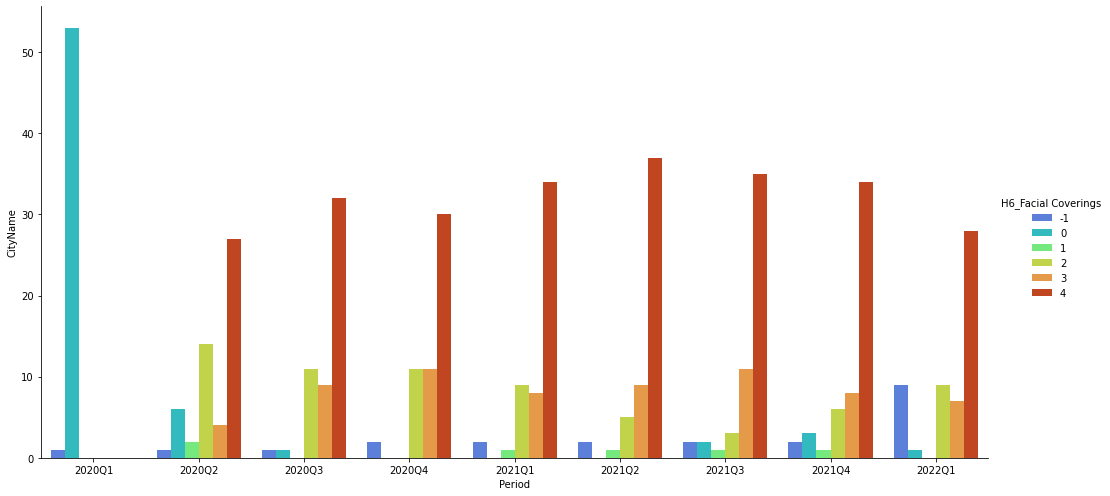

In [ ]:
sns.catplot(data=aux2, x='Period', y='CityName', hue='H6_Facial Coverings', kind='bar', height=7, aspect=2, palette='turbo')

In [ ]:
plot = sns.catplot(data=aux2, x='Period', y='CityName', hue='H6_Facial Coverings', kind='bar', height=7, aspect=1.3, palette='coolwarm')
plot.set(title='Nível de Restrição do uso de máscaras', ylabel='Cities Count')
plot

#pra saber o período que cada Quarter representa
#https://whatthequarter.com/

In [ ]:
aux2.describe()

H6_Facial Coverings   CityName
count            44.000000  44.000000
mean              1.545455  11.045455
std               1.810236  12.952426
min              -1.000000   1.000000
25%               0.000000   2.000000
50%               2.000000   6.500000
75%               3.000000  11.000000
max               4.000000  53.000000

In [ ]:
df_h6[df_h6['Date'] == '2022-03-08']


#create unique list of Cities and States
unique = df_h6[df_h6['Date'] == '2022-03-31'].CityName.unique()
print(str(len(unique)))
unique


54


array(['Ananindeua', 'Aparecida de Goiania', 'Aracaju', 'Araguaina',
       'Arapiraca', 'Belem', 'Belo Horizonte', 'Boa Vista', 'Brasilia',
       'Campina Grande', 'Campo Grande', 'Caucaia', 'Caxias do Sul',
       'Cruzeiro do Sul', 'Cuiaba', 'Curitiba', 'Dourados',
       'Feira de Santana', 'Florianopolis', 'Fortaleza', 'Goiania',
       'Guarulhos', 'Imperatriz', 'Jaboatao dos Guararapes', 'Ji-Parana',
       'Joao Pessoa', 'Joinville', 'Lagarto', 'Laranjal do Jari',
       'Londrina', 'Macapa', 'Maceio', 'Manaus', 'Mossoro', 'Natal',
       'Palmas', 'Parintins', 'Parnaiba', 'Porto Alegre', 'Porto Velho',
       'Recife', 'Rio Branco', 'Rio de Janeiro', 'Rondonopolis',
       'Rorainopolis', 'Salvador', 'Santarem', 'Sao Goncalo', 'Sao Luis',
       'Sao Paulo', 'Teresina', 'Uberlandia', 'Vila Velha', 'Vitoria'],
      dtype=object)

In [ ]:
a = df_h6.isna().any()

a.values

array([False, False, False,  True,  True,  True])

In [ ]:
#sns.catplot(data=df_h6, y=)
#3 em 3 meses
#groupby politica h6 e contar nº ocorrencias
x = pd.DataFrame(df_h6.loc[:,['Date', 'H6_Facial Coverings']].groupby(['Date', 'H6_Facial Coverings']).value_counts().reset_index())
x.head(-1000)

In [ ]:
#20200101
df_h6[df_h6['Date'] == 20200101]

In [ ]:
#create unique list of Cities and States
UniqueStatesCities = df_h6.CityName.unique()

#create a data frame dictionary to store your data frames
states_cities = {elem : pd.DataFrame for elem in UniqueStatesCities}

for key in states_cities.keys():
    states_cities[key] = df_h6[:][df_h6.CityName == key]
    states_cities[key].sort_values(by='Date', na_position='first', inplace=True)

print(len(UniqueStatesCities))

#54 cidades + Governo Federal + 26 estados + Distrito Federal
UniqueStatesCities

#Algumas cidades não estão na lista, pois tinham todos os indicadores nulos. São elas:
# Santaem, (mais uma possivelmente, não achei)

In [ ]:
#states_cities['Brasilia'].info()

In [ ]:
states_cities['Brasilia']

In [ ]:
#Pega um set(list mas unique) das notes de H6
set(states_cities['Brasilia'][states_cities['Brasilia']['H6_Notes'].notna()]['H6_Notes'].to_list())